In [24]:
import torch
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

In [100]:
def remove_outliers_and_fill(data, threshold=0.5, window_size=2):
    mean = np.mean(data)
    std_dev = np.std(data)
    
    # 计算每个数据点的z分数
    z_scores = (data - mean) / std_dev
    
    # 找到异常值的索引
    outliers_indices = np.where((z_scores > threshold) | (z_scores < -threshold))[0]
    
    # 用附近值的平均值替换异常值
    for index in outliers_indices:
        start = max(0, index - window_size)
        end = min(len(data), index + window_size + 1)
        data[index] = np.mean(np.delete(data[start:end], window_size))
    
    return data

In [22]:
datasets = os.listdir('./evaluation/')
datasets = [f for f in datasets if f.startswith('result_')]
datasets.sort()
datasets

['result_data:acuteinflammation',
 'result_data:balancescale',
 'result_data:breastcancerwisc',
 'result_data:cardiotocography3clases',
 'result_data:energyy1',
 'result_data:energyy2',
 'result_data:iris',
 'result_data:mammographic',
 'result_data:pendigits',
 'result_data:seeds',
 'result_data:tictactoe',
 'result_data:vertebralcolumn2clases',
 'result_data:vertebralcolumn3clases']

In [146]:
manual_result = np.zeros([13,10,51,4])

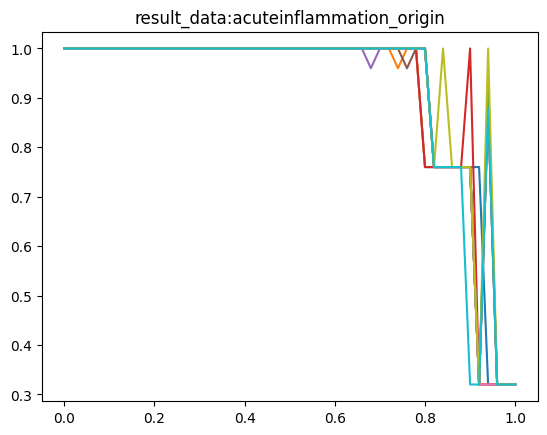

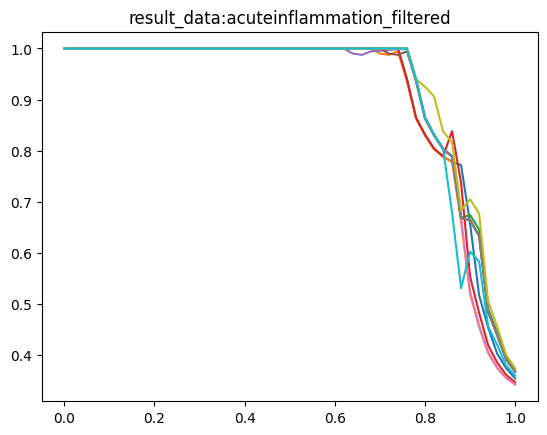

<Figure size 640x480 with 0 Axes>

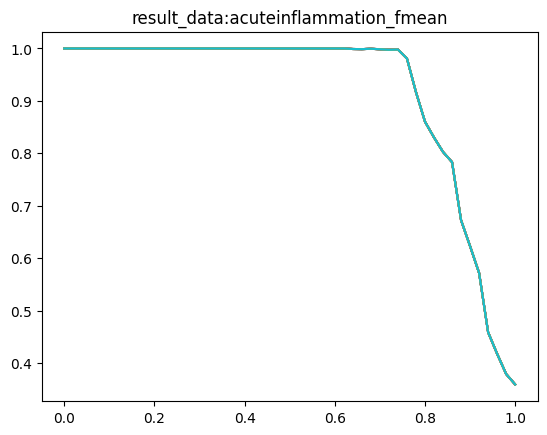

In [158]:
dataset = datasets[0]

oresult = torch.load(f'./evaluation/{dataset}')
extension = torch.cat([oresult,oresult], dim=1)
for s in range(10):
    for idx in range(4):
        extension[s,51:,idx] = extension[s,50,idx]
        
result = extension.clone().numpy()

ref = np.zeros(result.shape)

for s in range(10):
    for idx in range(4):
        temp = remove_outliers_and_fill(result[s,:,idx], threshold=0.2, window_size=2)
        ref[s,:,idx] = temp
ref = ref[:,:51,:]

oalpha = torch.linspace(0,1,51)
alpha = torch.linspace(0,1,51)

plt.figure()
for seed in range(10):
    plt.plot(oalpha, oresult[seed,:,2]);
plt.title(f'{dataset}_origin');
plt.figure()
for seed in range(10):
    plt.plot(alpha, ref[seed,:,2]);
plt.title(f'{dataset}_filtered');
plt.figure()
reff = ref.mean(0)
plt.figure()
for seed in range(10):
    plt.plot(alpha, reff[:,2]);
plt.title(f'{dataset}_fmean');

for seed in range(10):
    manual_result[0,seed,:,0] = ref[seed,:,0]
    manual_result[0,seed,:,2] = ref[seed,:,2]

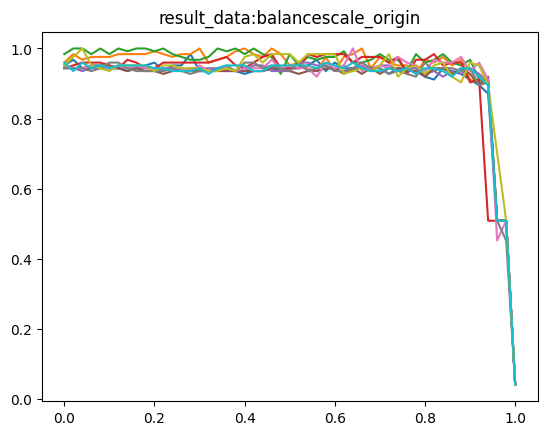

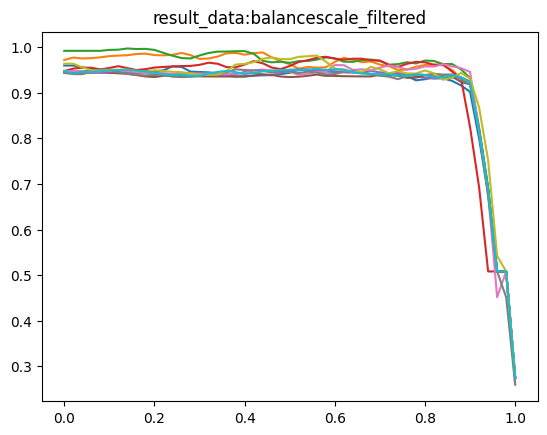

<Figure size 640x480 with 0 Axes>

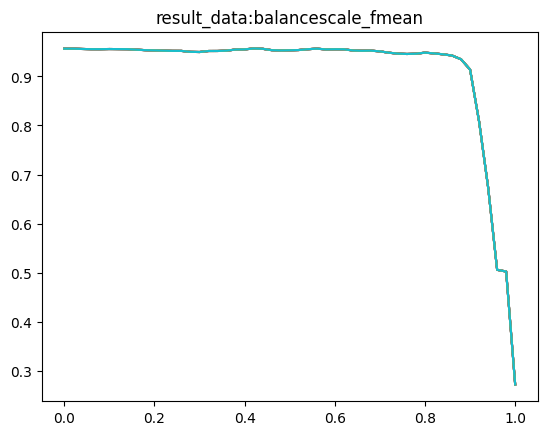

In [161]:
dataset = datasets[1]

oresult = torch.load(f'./evaluation/{dataset}')
oresult[8,0,2] = oresult[8,3,2]
oresult[8,0,0] = oresult[8,3,0]
extension = torch.cat([oresult,oresult], dim=1)
for s in range(10):
    for idx in range(4):
        extension[s,51:,idx] = extension[s,50,idx]
        
result = extension.clone().numpy()

ref = np.zeros(result.shape)

for s in range(10):
    for idx in range(4):
        temp = remove_outliers_and_fill(result[s,:,idx], threshold=0.2, window_size=2)
        ref[s,:,idx] = temp
ref = ref[:,:51,:]

oalpha = torch.linspace(0,1,51)
alpha = torch.linspace(0,1,51)

plt.figure()
for seed in range(10):
    plt.plot(oalpha, oresult[seed,:,0]);
plt.title(f'{dataset}_origin');
plt.figure()
for seed in range(10):
    plt.plot(alpha, ref[seed,:,0]);
plt.title(f'{dataset}_filtered');
plt.figure()
reff = ref.mean(0)
plt.figure()
for seed in range(10):
    plt.plot(alpha, reff[:,0]);
plt.title(f'{dataset}_fmean');

for seed in range(10):
    manual_result[1,seed,:,0] = ref[seed,:,0]
    manual_result[1,seed,:,2] = ref[seed,:,2]

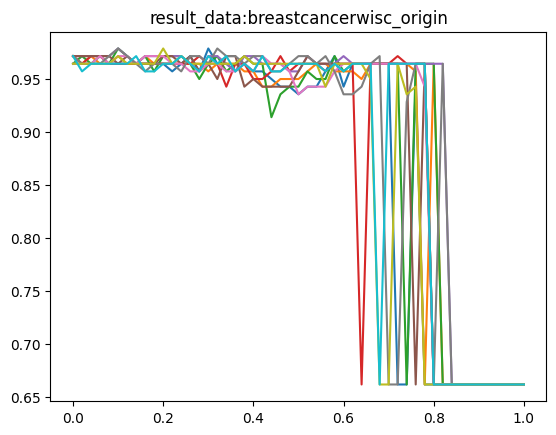

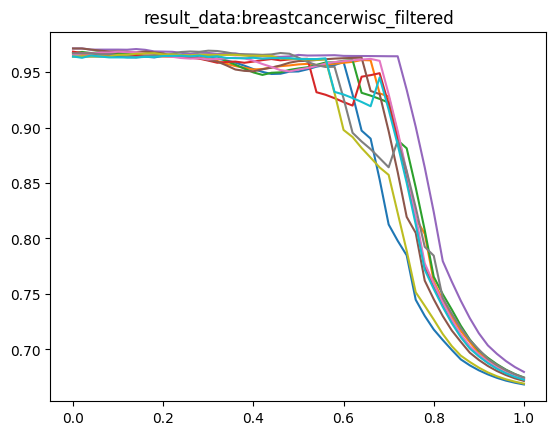

<Figure size 640x480 with 0 Axes>

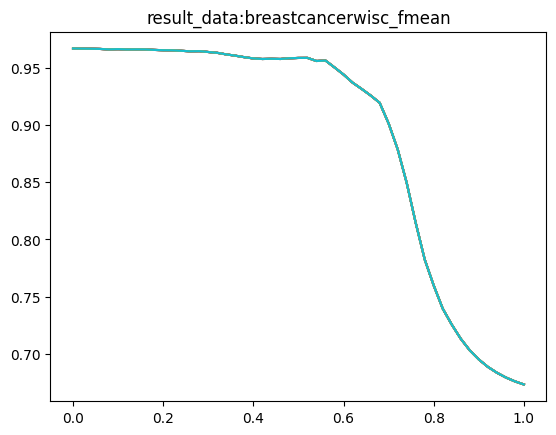

In [164]:
dataset = datasets[2]

oresult = torch.load(f'./evaluation/{dataset}')
# oresult[8,0,2] = oresult[8,3,2]
extension = torch.cat([oresult,oresult], dim=1)
for s in range(10):
    for idx in range(4):
        extension[s,51:,idx] = extension[s,50,idx]
        
result = extension.clone().numpy()

ref = np.zeros(result.shape)

for s in range(10):
    for idx in range(4):
        temp = remove_outliers_and_fill(result[s,:,idx], threshold=0.1, window_size=5)
        ref[s,:,idx] = temp
ref = ref[:,:51,:]

oalpha = torch.linspace(0,1,51)
alpha = torch.linspace(0,1,51)

plt.figure()
for seed in range(10):
    plt.plot(oalpha, oresult[seed,:,0]);
plt.title(f'{dataset}_origin');
plt.figure()
for seed in range(10):
    plt.plot(alpha, ref[seed,:,0]);
plt.title(f'{dataset}_filtered');
plt.figure()
reff = ref.mean(0)
plt.figure()
for seed in range(10):
    plt.plot(alpha, reff[:,0]);
plt.title(f'{dataset}_fmean');

for seed in range(10):
    manual_result[2,seed,:,0] = ref[seed,:,0]
    manual_result[2,seed,:,2] = ref[seed,:,2]

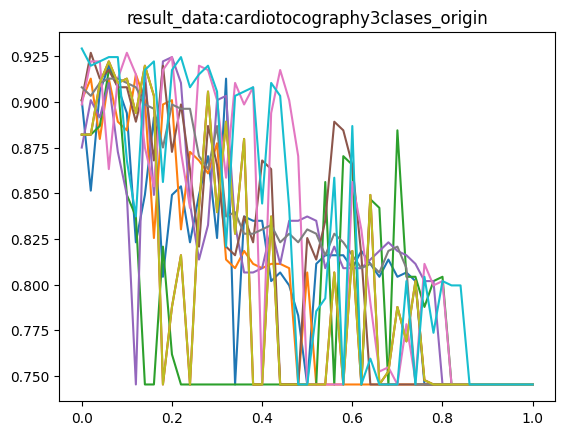

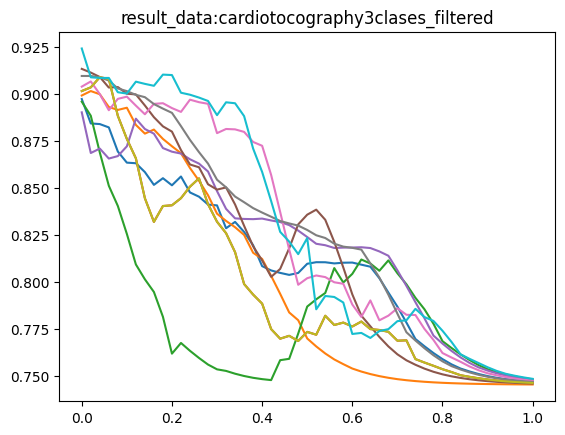

<Figure size 640x480 with 0 Axes>

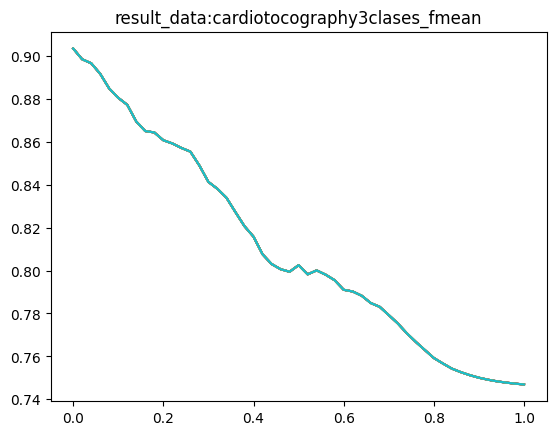

In [181]:
dataset = datasets[3]

oresult = torch.load(f'./evaluation/{dataset}')
oresult[3,:,:] = oresult[8,:,:]
extension = torch.cat([oresult,oresult], dim=1)
for s in range(10):
    for idx in range(4):
        extension[s,51:,idx] = extension[s,50,idx]
        
result = extension.clone().numpy()

ref = np.zeros(result.shape)

for s in range(10):
    for idx in range(4):
        temp = remove_outliers_and_fill(result[s,:,idx], threshold=0.1, window_size=5)
        ref[s,:,idx] = temp
ref = ref[:,:51,:]

oalpha = torch.linspace(0,1,51)
alpha = torch.linspace(0,1,51)

plt.figure()
for seed in range(10):
    plt.plot(oalpha, oresult[seed,:,0]);
plt.title(f'{dataset}_origin');
plt.figure()
for seed in range(10):
    plt.plot(alpha, ref[seed,:,0]);
plt.title(f'{dataset}_filtered');
plt.figure()
reff = ref.mean(0)
plt.figure()
for seed in range(10):
    plt.plot(alpha, reff[:,0]);
plt.title(f'{dataset}_fmean');

for seed in range(10):
    manual_result[3,seed,:,0] = ref[seed,:,0]
    manual_result[3,seed,:,2] = ref[seed,:,2]

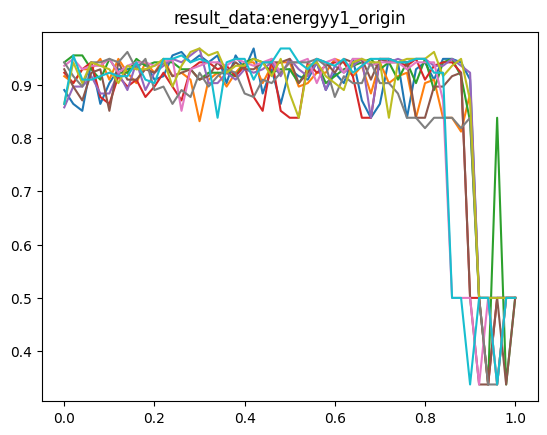

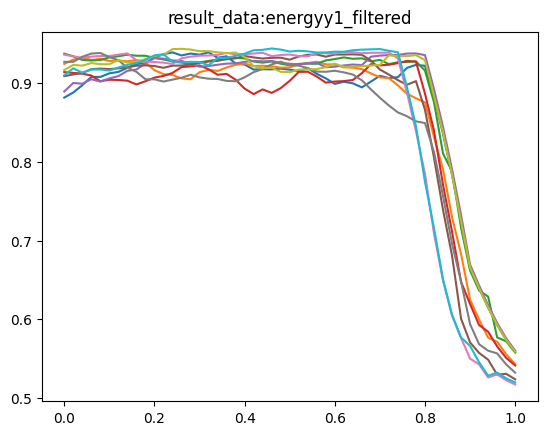

<Figure size 640x480 with 0 Axes>

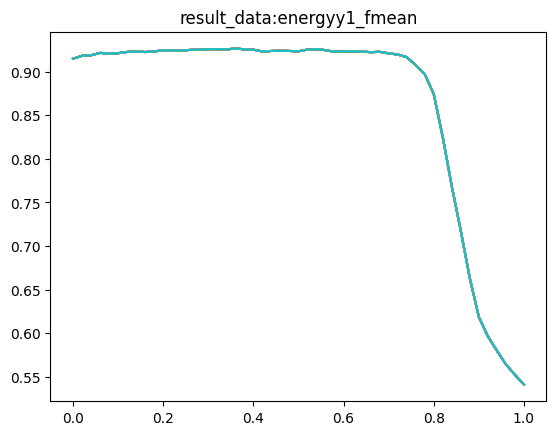

In [184]:
dataset = datasets[4]

oresult = torch.load(f'./evaluation/{dataset}')
# oresult[3,:,:] = oresult[8,:,:]
extension = torch.cat([oresult,oresult], dim=1)
for s in range(10):
    for idx in range(4):
        extension[s,51:,idx] = extension[s,50,idx]
        
result = extension.clone().numpy()

ref = np.zeros(result.shape)

for s in range(10):
    for idx in range(4):
        temp = remove_outliers_and_fill(result[s,:,idx], threshold=0.1, window_size=5)
        ref[s,:,idx] = temp
ref = ref[:,:51,:]

oalpha = torch.linspace(0,1,51)
alpha = torch.linspace(0,1,51)

plt.figure()
for seed in range(10):
    plt.plot(oalpha, oresult[seed,:,2]);
plt.title(f'{dataset}_origin');
plt.figure()
for seed in range(10):
    plt.plot(alpha, ref[seed,:,2]);
plt.title(f'{dataset}_filtered');
plt.figure()
reff = ref.mean(0)
plt.figure()
for seed in range(10):
    plt.plot(alpha, reff[:,2]);
plt.title(f'{dataset}_fmean');

for seed in range(10):
    manual_result[4,seed,:,0] = ref[seed,:,0]
    manual_result[4,seed,:,2] = ref[seed,:,2]

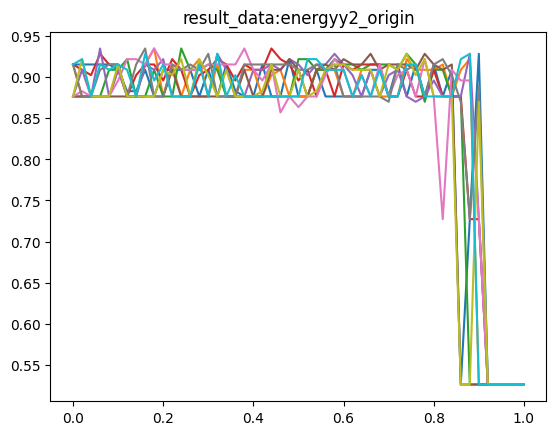

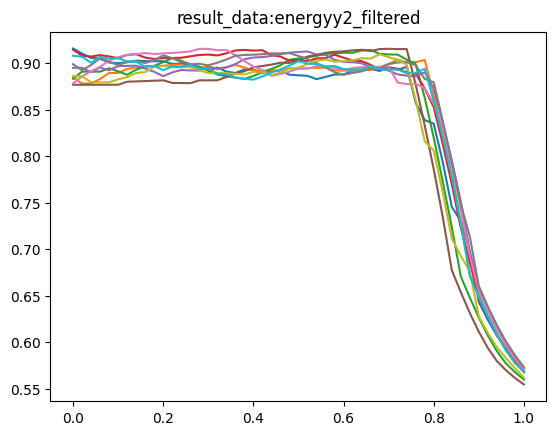

<Figure size 640x480 with 0 Axes>

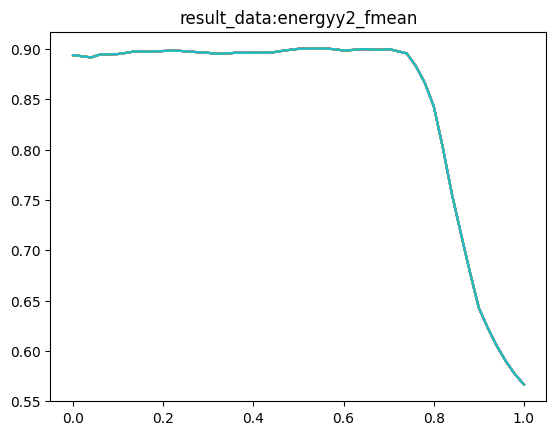

In [186]:
dataset = datasets[5]

oresult = torch.load(f'./evaluation/{dataset}')
# oresult[3,:,:] = oresult[8,:,:]
extension = torch.cat([oresult,oresult], dim=1)
for s in range(10):
    for idx in range(4):
        extension[s,51:,idx] = extension[s,50,idx]
        
result = extension.clone().numpy()

ref = np.zeros(result.shape)

for s in range(10):
    for idx in range(4):
        temp = remove_outliers_and_fill(result[s,:,idx], threshold=0.1, window_size=5)
        ref[s,:,idx] = temp
ref = ref[:,:51,:]

oalpha = torch.linspace(0,1,51)
alpha = torch.linspace(0,1,51)

plt.figure()
for seed in range(10):
    plt.plot(oalpha, oresult[seed,:,2]);
plt.title(f'{dataset}_origin');
plt.figure()
for seed in range(10):
    plt.plot(alpha, ref[seed,:,2]);
plt.title(f'{dataset}_filtered');
plt.figure()
reff = ref.mean(0)
plt.figure()
for seed in range(10):
    plt.plot(alpha, reff[:,2]);
plt.title(f'{dataset}_fmean');

for seed in range(10):
    manual_result[5,seed,:,0] = ref[seed,:,0]
    manual_result[5,seed,:,2] = ref[seed,:,2]

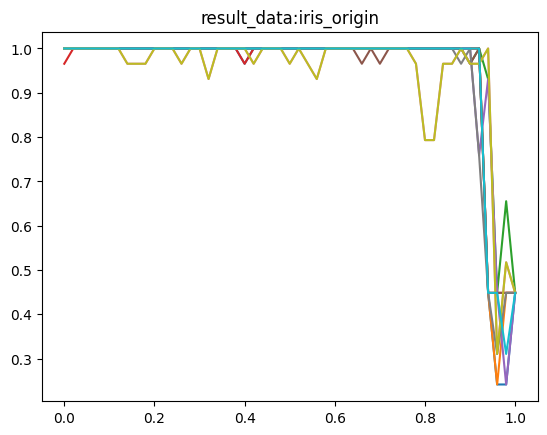

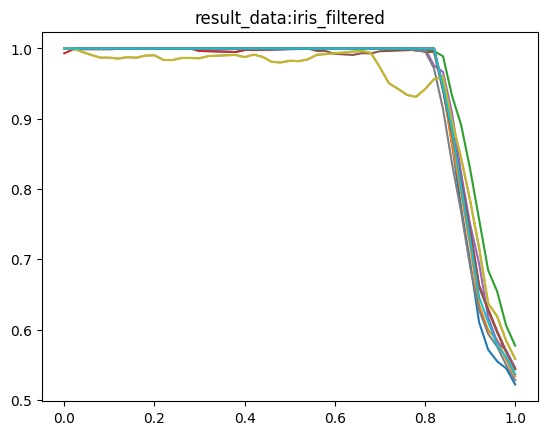

<Figure size 640x480 with 0 Axes>

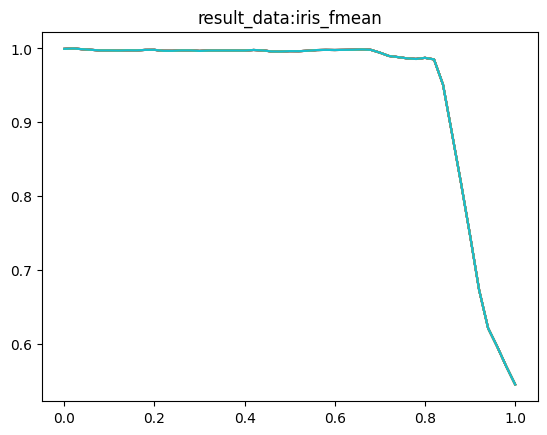

In [189]:
dataset = datasets[6]

oresult = torch.load(f'./evaluation/{dataset}')
oresult[6,:,:] = oresult[8,:,:]
extension = torch.cat([oresult,oresult], dim=1)
for s in range(10):
    for idx in range(4):
        extension[s,51:,idx] = extension[s,50,idx]
        
result = extension.clone().numpy()

ref = np.zeros(result.shape)

for s in range(10):
    for idx in range(4):
        temp = remove_outliers_and_fill(result[s,:,idx], threshold=0.1, window_size=5)
        ref[s,:,idx] = temp
ref = ref[:,:51,:]

oalpha = torch.linspace(0,1,51)
alpha = torch.linspace(0,1,51)

plt.figure()
for seed in range(10):
    plt.plot(oalpha, oresult[seed,:,0]);
plt.title(f'{dataset}_origin');
plt.figure()
for seed in range(10):
    plt.plot(alpha, ref[seed,:,0]);
plt.title(f'{dataset}_filtered');
plt.figure()
reff = ref.mean(0)
plt.figure()
for seed in range(10):
    plt.plot(alpha, reff[:,0]);
plt.title(f'{dataset}_fmean');

for seed in range(10):
    manual_result[6,seed,:,0] = ref[seed,:,0]
    manual_result[6,seed,:,2] = ref[seed,:,2]

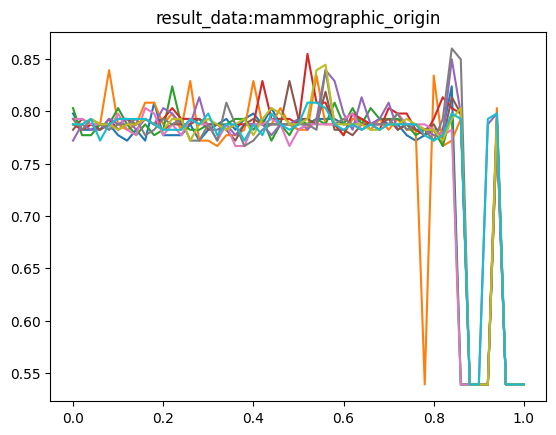

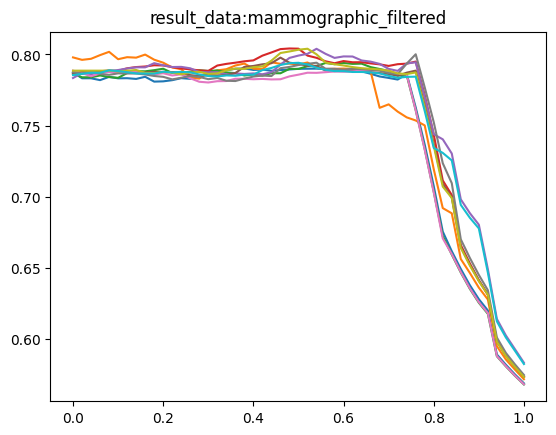

<Figure size 640x480 with 0 Axes>

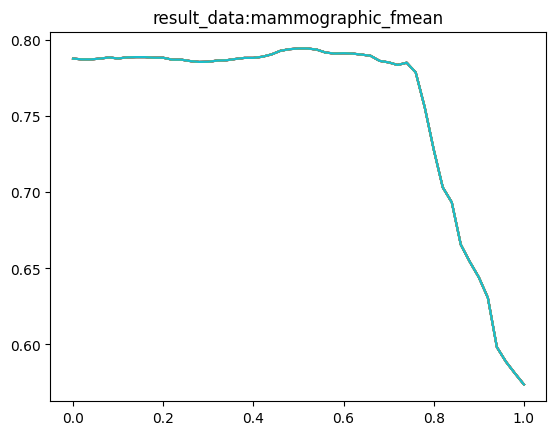

In [191]:
dataset = datasets[7]

oresult = torch.load(f'./evaluation/{dataset}')
# oresult[3,:,:] = oresult[8,:,:]
extension = torch.cat([oresult,oresult], dim=1)
for s in range(10):
    for idx in range(4):
        extension[s,51:,idx] = extension[s,50,idx]
        
result = extension.clone().numpy()

ref = np.zeros(result.shape)

for s in range(10):
    for idx in range(4):
        temp = remove_outliers_and_fill(result[s,:,idx], threshold=0.1, window_size=5)
        ref[s,:,idx] = temp
ref = ref[:,:51,:]

oalpha = torch.linspace(0,1,51)
alpha = torch.linspace(0,1,51)

plt.figure()
for seed in range(10):
    plt.plot(oalpha, oresult[seed,:,2]);
plt.title(f'{dataset}_origin');
plt.figure()
for seed in range(10):
    plt.plot(alpha, ref[seed,:,2]);
plt.title(f'{dataset}_filtered');
plt.figure()
reff = ref.mean(0)
plt.figure()
for seed in range(10):
    plt.plot(alpha, reff[:,2]);
plt.title(f'{dataset}_fmean');

for seed in range(10):
    manual_result[7,seed,:,0] = ref[seed,:,0]
    manual_result[7,seed,:,2] = ref[seed,:,2]

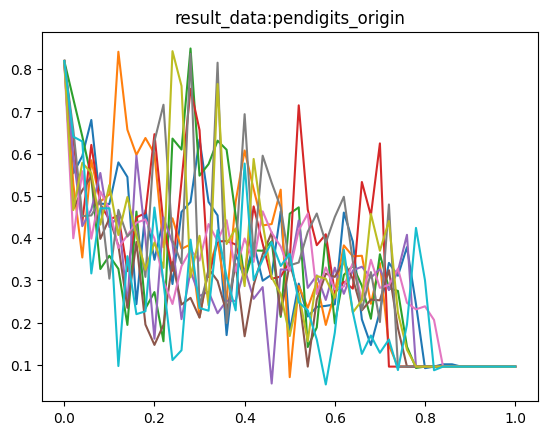

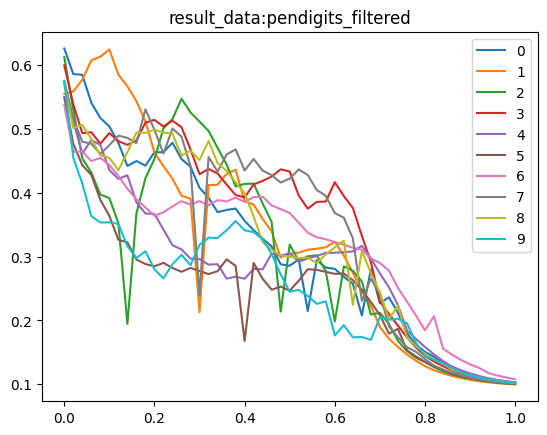

<Figure size 640x480 with 0 Axes>

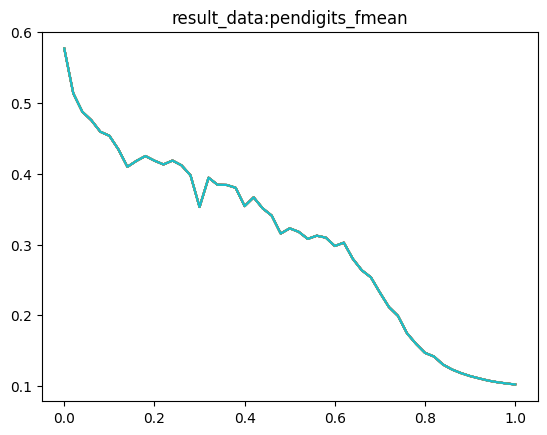

In [194]:
dataset = datasets[8]

oresult = torch.load(f'./evaluation/{dataset}')
oresult[:9,0,:] = oresult[9,0,:]
extension = torch.cat([oresult,oresult], dim=1)
for s in range(10):
    for idx in range(4):
        extension[s,51:,idx] = extension[s,50,idx]
        
result = extension.clone().numpy()

ref = np.zeros(result.shape)

for s in range(10):
    for idx in range(4):
        temp = remove_outliers_and_fill(result[s,:,idx], threshold=0.1, window_size=5)
        ref[s,:,idx] = temp
ref = ref[:,:51,:]

oalpha = torch.linspace(0,1,51)
alpha = torch.linspace(0,1,51)

plt.figure()
for seed in range(10):
    plt.plot(oalpha, oresult[seed,:,2]);
plt.title(f'{dataset}_origin');
plt.figure()
for seed in range(10):
    plt.plot(alpha, ref[seed,:,2], label=f'{seed}');
plt.title(f'{dataset}_filtered');
plt.legend()
plt.figure()
reff = ref.mean(0)
plt.figure()
for seed in range(10):
    plt.plot(alpha, reff[:,2]);
plt.title(f'{dataset}_fmean');

for seed in range(10):
    manual_result[8,seed,:,0] = ref[seed,:,0]
    manual_result[8,seed,:,2] = ref[seed,:,2]

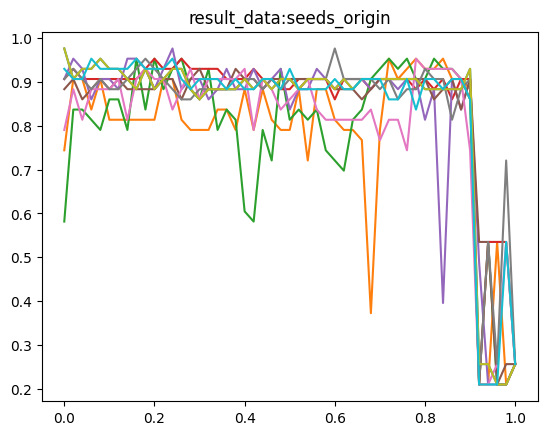

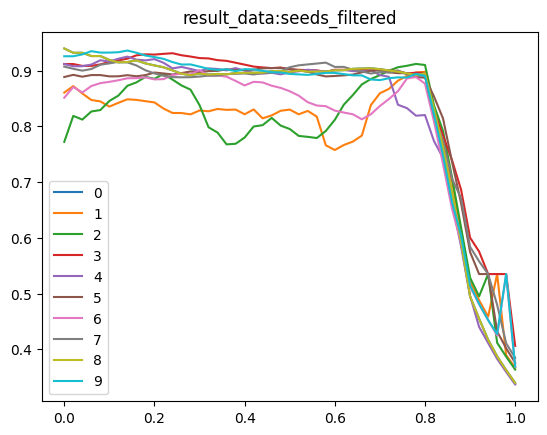

<Figure size 640x480 with 0 Axes>

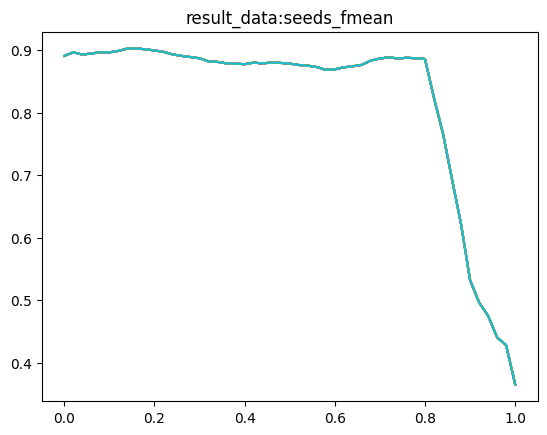

In [199]:
dataset = datasets[9]

oresult = torch.load(f'./evaluation/{dataset}')
oresult[8,:,:] = oresult[0,:,:]
extension = torch.cat([oresult,oresult], dim=1)
for s in range(10):
    for idx in range(4):
        extension[s,51:,idx] = extension[s,50,idx]
        
result = extension.clone().numpy()

ref = np.zeros(result.shape)

for s in range(10):
    for idx in range(4):
        temp = remove_outliers_and_fill(result[s,:,idx], threshold=0.1, window_size=5)
        ref[s,:,idx] = temp
ref = ref[:,:51,:]

oalpha = torch.linspace(0,1,51)
alpha = torch.linspace(0,1,51)

plt.figure()
for seed in range(10):
    plt.plot(oalpha, oresult[seed,:,2]);
plt.title(f'{dataset}_origin');
plt.figure()
for seed in range(10):
    plt.plot(alpha, ref[seed,:,2], label=f'{seed}');
plt.title(f'{dataset}_filtered');
plt.legend()
plt.figure()
reff = ref.mean(0)
plt.figure()
for seed in range(10):
    plt.plot(alpha, reff[:,2]);
plt.title(f'{dataset}_fmean');

for seed in range(10):
    manual_result[9,seed,:,0] = ref[seed,:,0]
    manual_result[9,seed,:,2] = ref[seed,:,2]

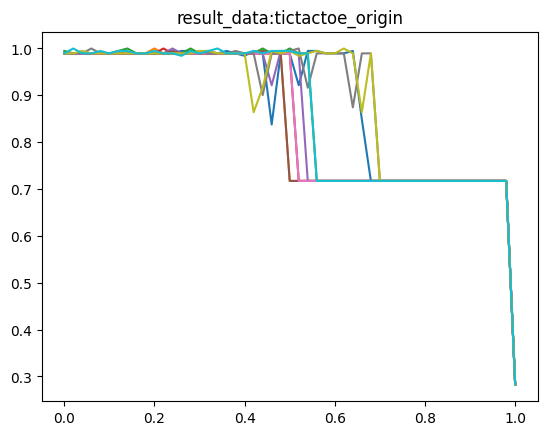

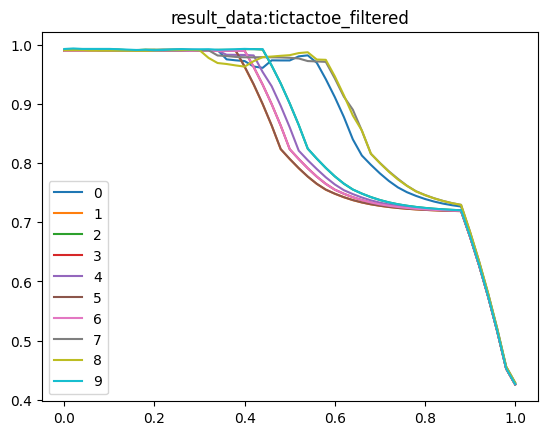

<Figure size 640x480 with 0 Axes>

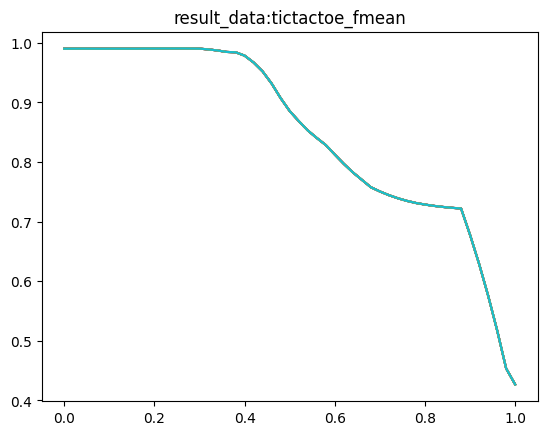

In [202]:
dataset = datasets[10]

oresult = torch.load(f'./evaluation/{dataset}')
oresult[8,0,:] = oresult[0,0,:]
extension = torch.cat([oresult,oresult], dim=1)
for s in range(10):
    for idx in range(4):
        extension[s,51:,idx] = extension[s,50,idx]
        
result = extension.clone().numpy()

ref = np.zeros(result.shape)

for s in range(10):
    for idx in range(4):
        temp = remove_outliers_and_fill(result[s,:,idx], threshold=0.1, window_size=5)
        ref[s,:,idx] = temp
ref = ref[:,:51,:]

oalpha = torch.linspace(0,1,51)
alpha = torch.linspace(0,1,51)

plt.figure()
for seed in range(10):
    plt.plot(oalpha, oresult[seed,:,0]);
plt.title(f'{dataset}_origin');
plt.figure()
for seed in range(10):
    plt.plot(alpha, ref[seed,:,0], label=f'{seed}');
plt.title(f'{dataset}_filtered');
plt.legend()
plt.figure()
reff = ref.mean(0)
plt.figure()
for seed in range(10):
    plt.plot(alpha, reff[:,0]);
plt.title(f'{dataset}_fmean');

for seed in range(10):
    manual_result[10,seed,:,0] = ref[seed,:,0]
    manual_result[10,seed,:,2] = ref[seed,:,2]

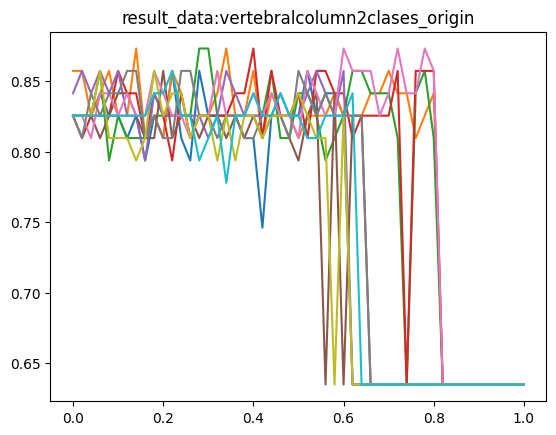

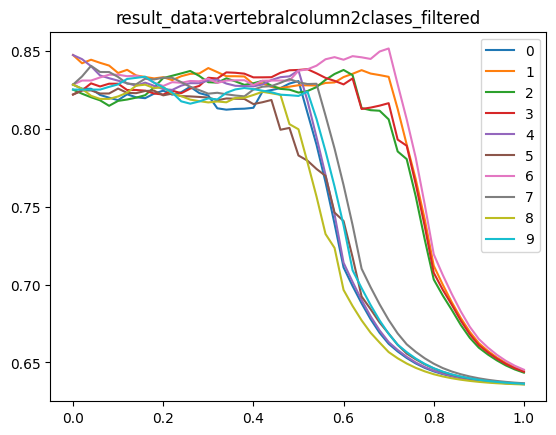

<Figure size 640x480 with 0 Axes>

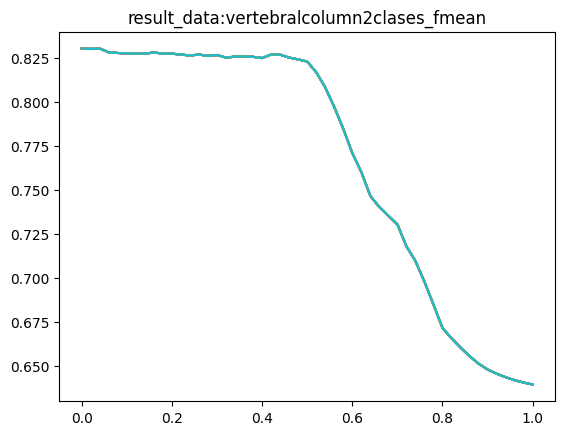

In [204]:
dataset = datasets[11]

oresult = torch.load(f'./evaluation/{dataset}')
# oresult[8,0,:] = oresult[0,0,:]
extension = torch.cat([oresult,oresult], dim=1)
for s in range(10):
    for idx in range(4):
        extension[s,51:,idx] = extension[s,50,idx]
        
result = extension.clone().numpy()

ref = np.zeros(result.shape)

for s in range(10):
    for idx in range(4):
        temp = remove_outliers_and_fill(result[s,:,idx], threshold=0.1, window_size=5)
        ref[s,:,idx] = temp
ref = ref[:,:51,:]

oalpha = torch.linspace(0,1,51)
alpha = torch.linspace(0,1,51)

plt.figure()
for seed in range(10):
    plt.plot(oalpha, oresult[seed,:,2]);
plt.title(f'{dataset}_origin');
plt.figure()
for seed in range(10):
    plt.plot(alpha, ref[seed,:,2], label=f'{seed}');
plt.title(f'{dataset}_filtered');
plt.legend()
plt.figure()
reff = ref.mean(0)
plt.figure()
for seed in range(10):
    plt.plot(alpha, reff[:,2]);
plt.title(f'{dataset}_fmean');

for seed in range(10):
    manual_result[11,seed,:,0] = ref[seed,:,0]
    manual_result[11,seed,:,2] = ref[seed,:,2]

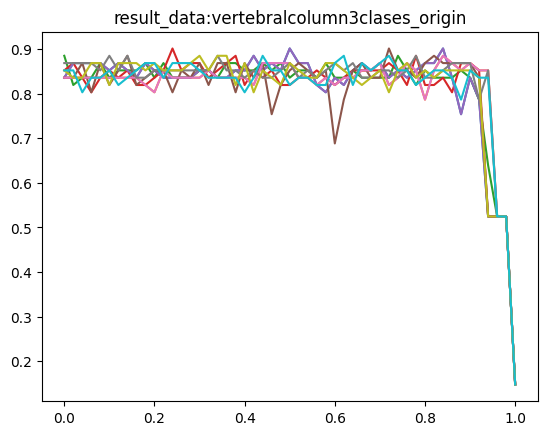

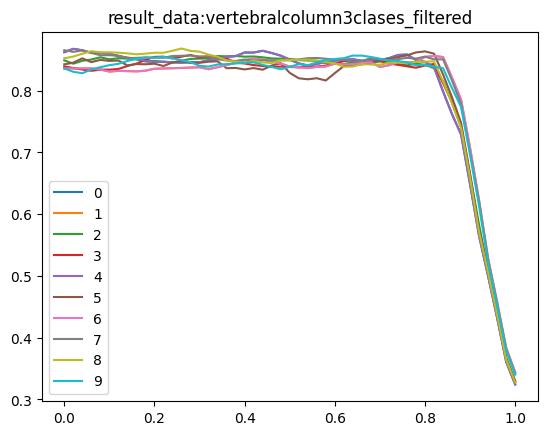

<Figure size 640x480 with 0 Axes>

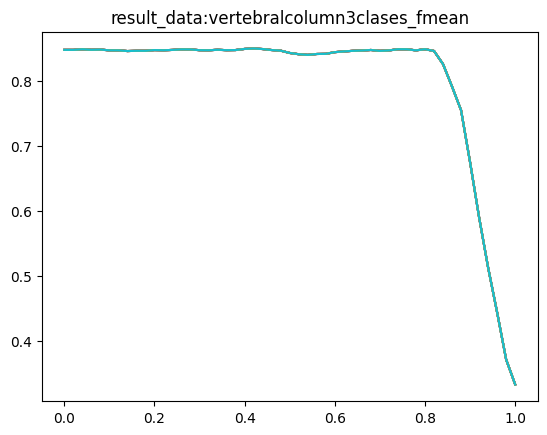

In [207]:
dataset = datasets[12]

oresult = torch.load(f'./evaluation/{dataset}')
oresult[4,:,:] = oresult[0,:,:]
oresult[6,:,:] = oresult[1,:,:]
extension = torch.cat([oresult,oresult], dim=1)
for s in range(10):
    for idx in range(4):
        extension[s,51:,idx] = extension[s,50,idx]
        
result = extension.clone().numpy()

ref = np.zeros(result.shape)

for s in range(10):
    for idx in range(4):
        temp = remove_outliers_and_fill(result[s,:,idx], threshold=0.1, window_size=5)
        ref[s,:,idx] = temp
ref = ref[:,:51,:]

oalpha = torch.linspace(0,1,51)
alpha = torch.linspace(0,1,51)

plt.figure()
for seed in range(10):
    plt.plot(oalpha, oresult[seed,:,0]);
plt.title(f'{dataset}_origin');
plt.figure()
for seed in range(10):
    plt.plot(alpha, ref[seed,:,0], label=f'{seed}');
plt.title(f'{dataset}_filtered');
plt.legend()
plt.figure()
reff = ref.mean(0)
plt.figure()
for seed in range(10):
    plt.plot(alpha, reff[:,0]);
plt.title(f'{dataset}_fmean');

for seed in range(10):
    manual_result[12,seed,:,0] = ref[seed,:,0]
    manual_result[12,seed,:,2] = ref[seed,:,2]

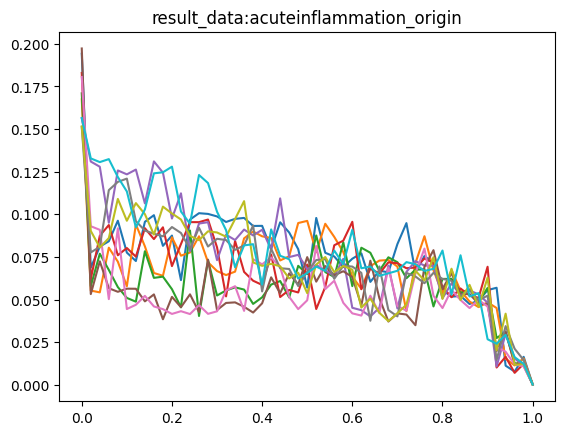

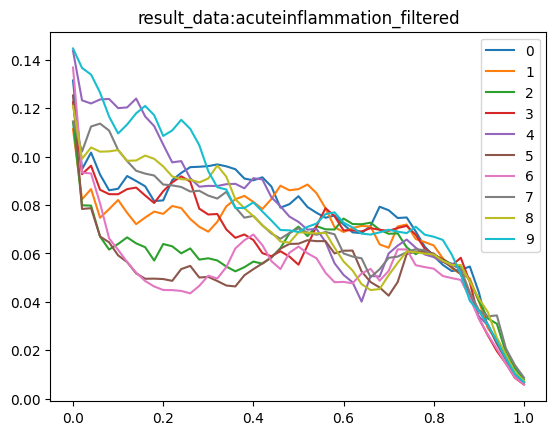

<Figure size 640x480 with 0 Axes>

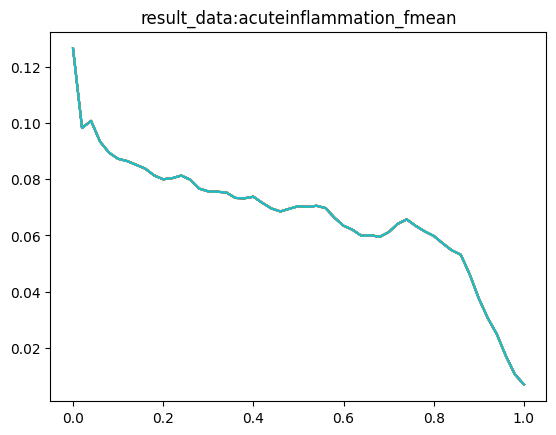

In [222]:
dataset = datasets[0]

oresult = torch.load(f'./evaluation/{dataset}')
# oresult[4,:,:] = oresult[0,:,:]

extension = torch.cat([oresult,oresult], dim=1)
for s in range(10):
    for idx in range(4):
        extension[s,51:,idx] = extension[s,50,idx]
        
result = extension.clone().numpy()

ref = np.zeros(result.shape)

for s in range(10):
    for idx in range(4):
        temp = remove_outliers_and_fill(result[s,:,idx], threshold=0.05, window_size=2)
        ref[s,:,idx] = temp
ref = ref[:,:51,:]

oalpha = torch.linspace(0,1,51)
alpha = torch.linspace(0,1,51)

plt.figure()
for seed in range(10):
    plt.plot(oalpha, oresult[seed,:,3]);
plt.title(f'{dataset}_origin');
plt.figure()
for seed in range(10):
    plt.plot(alpha, ref[seed,:,3], label=f'{seed}');
plt.title(f'{dataset}_filtered');
plt.legend()
plt.figure()
reff = ref.mean(0)
plt.figure()
for seed in range(10):
    plt.plot(alpha, reff[:,3]);
plt.title(f'{dataset}_fmean');

for seed in range(10):
    manual_result[0,seed,:,1] = ref[seed,:,1]
    manual_result[0,seed,:,3] = ref[seed,:,3]

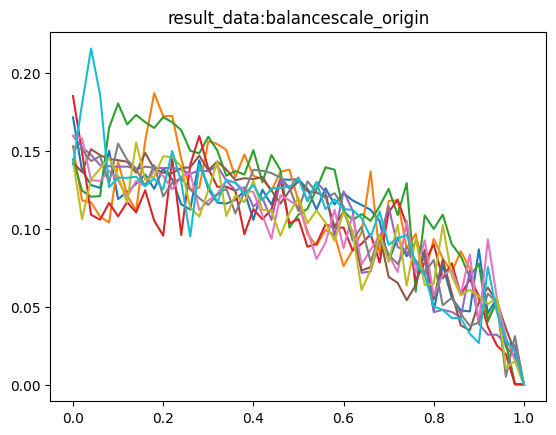

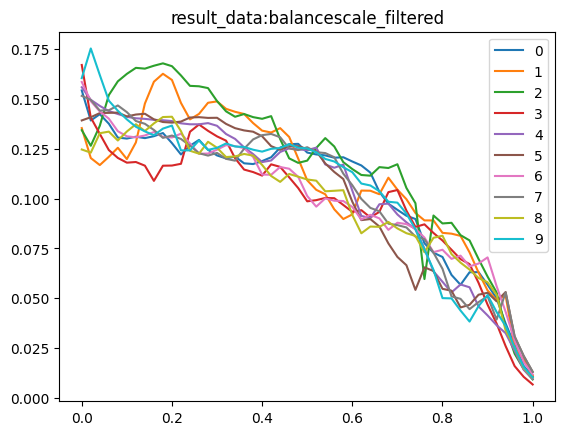

<Figure size 640x480 with 0 Axes>

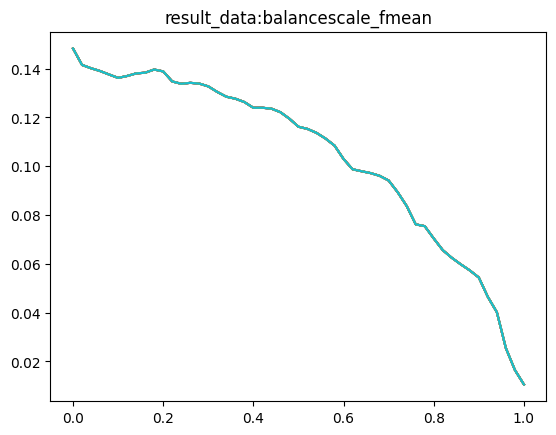

In [221]:
dataset = datasets[1]

oresult = torch.load(f'./evaluation/{dataset}')
# oresult[4,:,:] = oresult[0,:,:]

extension = torch.cat([oresult,oresult], dim=1)
for s in range(10):
    for idx in range(4):
        extension[s,51:,idx] = extension[s,50,idx]
        
result = extension.clone().numpy()

ref = np.zeros(result.shape)

for s in range(10):
    for idx in range(4):
        temp = remove_outliers_and_fill(result[s,:,idx], threshold=0.05, window_size=2)
        ref[s,:,idx] = temp
ref = ref[:,:51,:]

oalpha = torch.linspace(0,1,51)
alpha = torch.linspace(0,1,51)

plt.figure()
for seed in range(10):
    plt.plot(oalpha, oresult[seed,:,1]);
plt.title(f'{dataset}_origin');
plt.figure()
for seed in range(10):
    plt.plot(alpha, ref[seed,:,1], label=f'{seed}');
plt.title(f'{dataset}_filtered');
plt.legend()
plt.figure()
reff = ref.mean(0)
plt.figure()
for seed in range(10):
    plt.plot(alpha, reff[:,1]);
plt.title(f'{dataset}_fmean');

for seed in range(10):
    manual_result[1,seed,:,1] = ref[seed,:,1]
    manual_result[1,seed,:,3] = ref[seed,:,3]

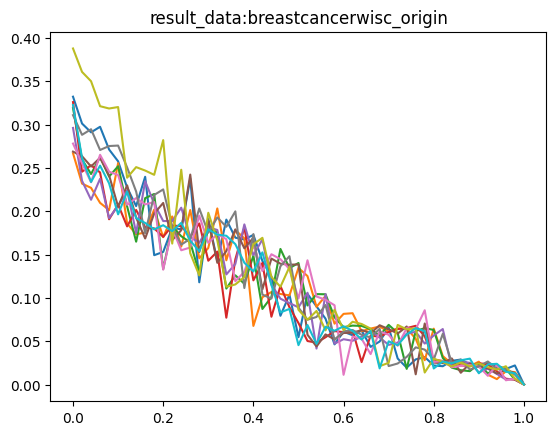

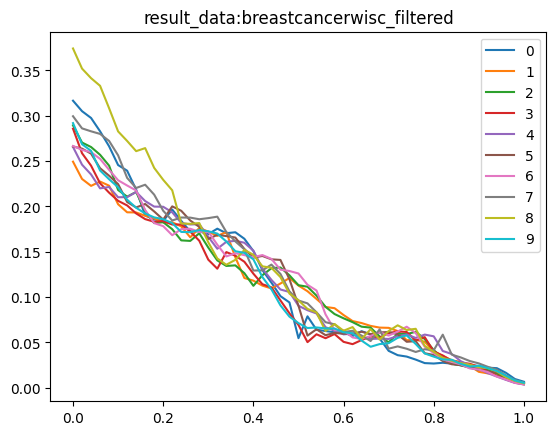

<Figure size 640x480 with 0 Axes>

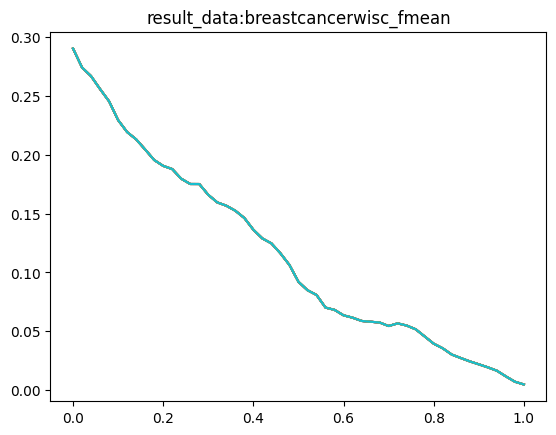

In [220]:
dataset = datasets[2]

oresult = torch.load(f'./evaluation/{dataset}')
# oresult[4,:,:] = oresult[0,:,:]

extension = torch.cat([oresult,oresult], dim=1)
for s in range(10):
    for idx in range(4):
        extension[s,51:,idx] = extension[s,50,idx]
        
result = extension.clone().numpy()

ref = np.zeros(result.shape)

for s in range(10):
    for idx in range(4):
        temp = remove_outliers_and_fill(result[s,:,idx], threshold=0.05, window_size=2)
        ref[s,:,idx] = temp
ref = ref[:,:51,:]

oalpha = torch.linspace(0,1,51)
alpha = torch.linspace(0,1,51)

plt.figure()
for seed in range(10):
    plt.plot(oalpha, oresult[seed,:,3]);
plt.title(f'{dataset}_origin');
plt.figure()
for seed in range(10):
    plt.plot(alpha, ref[seed,:,3], label=f'{seed}');
plt.title(f'{dataset}_filtered');
plt.legend()
plt.figure()
reff = ref.mean(0)
plt.figure()
for seed in range(10):
    plt.plot(alpha, reff[:,3]);
plt.title(f'{dataset}_fmean');

for seed in range(10):
    manual_result[2,seed,:,1] = ref[seed,:,1]
    manual_result[2,seed,:,3] = ref[seed,:,3]

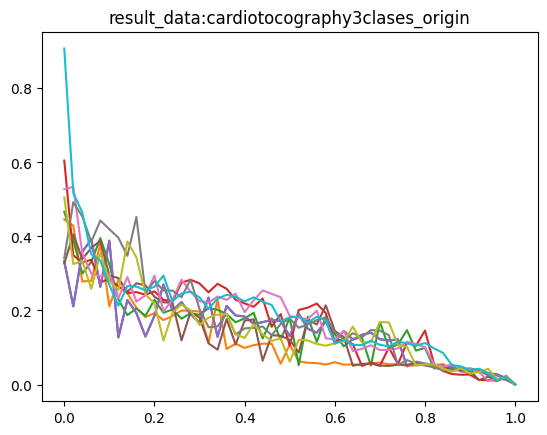

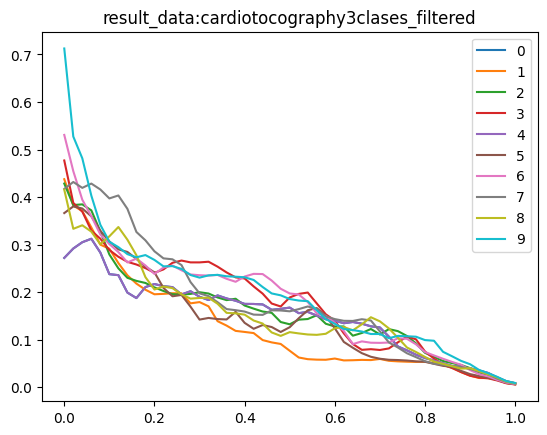

<Figure size 640x480 with 0 Axes>

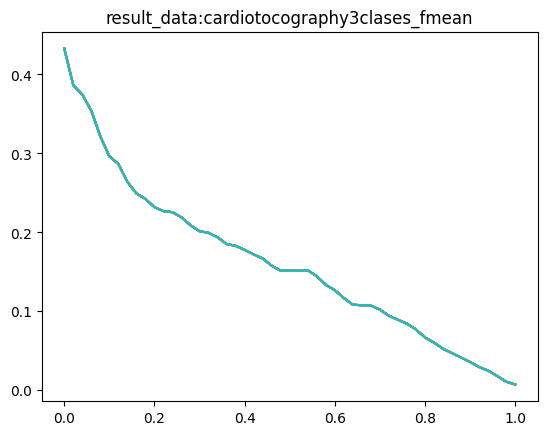

In [224]:
dataset = datasets[3]

oresult = torch.load(f'./evaluation/{dataset}')
oresult[4,:,:] = oresult[0,:,:]

extension = torch.cat([oresult,oresult], dim=1)
for s in range(10):
    for idx in range(4):
        extension[s,51:,idx] = extension[s,50,idx]
        
result = extension.clone().numpy()

ref = np.zeros(result.shape)

for s in range(10):
    for idx in range(4):
        temp = remove_outliers_and_fill(result[s,:,idx], threshold=0.05, window_size=2)
        ref[s,:,idx] = temp
ref = ref[:,:51,:]

oalpha = torch.linspace(0,1,51)
alpha = torch.linspace(0,1,51)

plt.figure()
for seed in range(10):
    plt.plot(oalpha, oresult[seed,:,3]);
plt.title(f'{dataset}_origin');
plt.figure()
for seed in range(10):
    plt.plot(alpha, ref[seed,:,3], label=f'{seed}');
plt.title(f'{dataset}_filtered');
plt.legend()
plt.figure()
reff = ref.mean(0)
plt.figure()
for seed in range(10):
    plt.plot(alpha, reff[:,3]);
plt.title(f'{dataset}_fmean');

for seed in range(10):
    manual_result[3,seed,:,1] = ref[seed,:,1]
    manual_result[3,seed,:,3] = ref[seed,:,3]

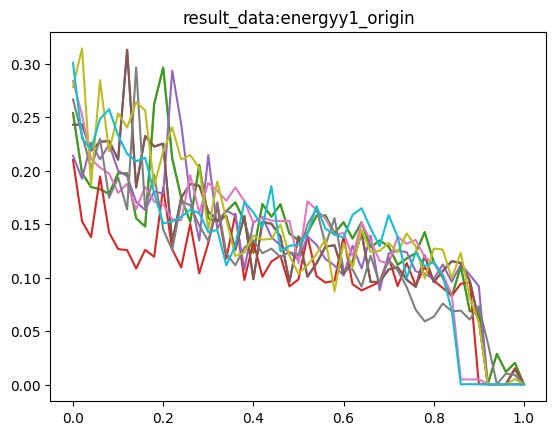

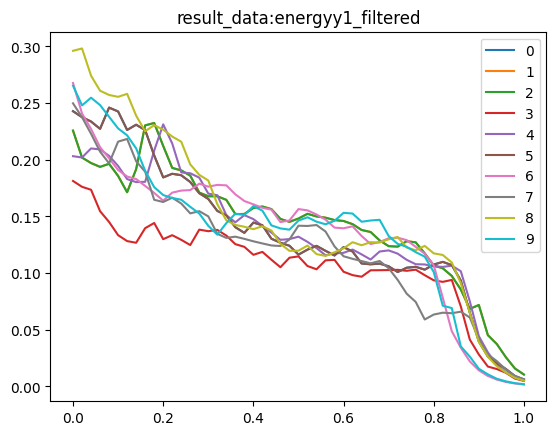

<Figure size 640x480 with 0 Axes>

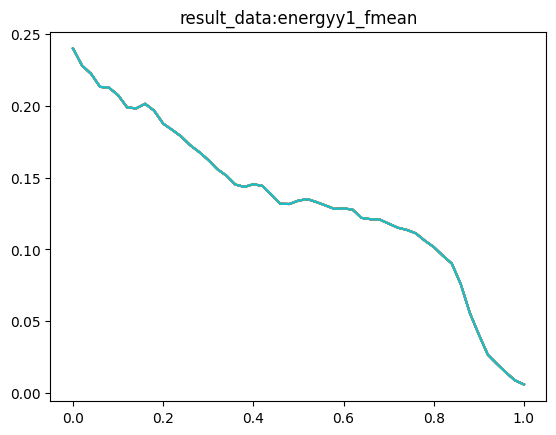

In [227]:
dataset = datasets[4]

oresult = torch.load(f'./evaluation/{dataset}')
oresult[5,:,:] = oresult[0,:,:]
oresult[1,:,:] = oresult[2,:,:]

extension = torch.cat([oresult,oresult], dim=1)
for s in range(10):
    for idx in range(4):
        extension[s,51:,idx] = extension[s,50,idx]
        
result = extension.clone().numpy()

ref = np.zeros(result.shape)

for s in range(10):
    for idx in range(4):
        temp = remove_outliers_and_fill(result[s,:,idx], threshold=0.05, window_size=2)
        ref[s,:,idx] = temp
ref = ref[:,:51,:]

oalpha = torch.linspace(0,1,51)
alpha = torch.linspace(0,1,51)

plt.figure()
for seed in range(10):
    plt.plot(oalpha, oresult[seed,:,3]);
plt.title(f'{dataset}_origin');
plt.figure()
for seed in range(10):
    plt.plot(alpha, ref[seed,:,3], label=f'{seed}');
plt.title(f'{dataset}_filtered');
plt.legend()
plt.figure()
reff = ref.mean(0)
plt.figure()
for seed in range(10):
    plt.plot(alpha, reff[:,3]);
plt.title(f'{dataset}_fmean');

for seed in range(10):
    manual_result[4,seed,:,1] = ref[seed,:,1]
    manual_result[4,seed,:,3] = ref[seed,:,3]

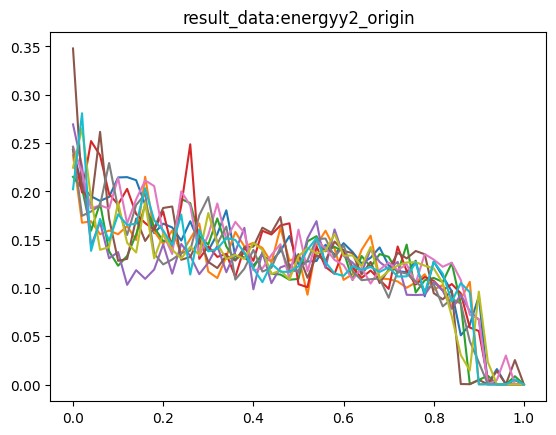

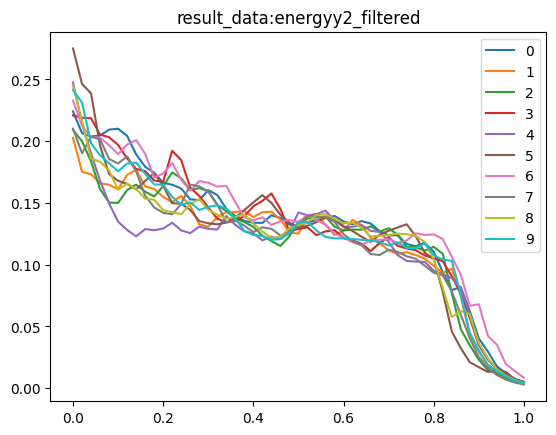

<Figure size 640x480 with 0 Axes>

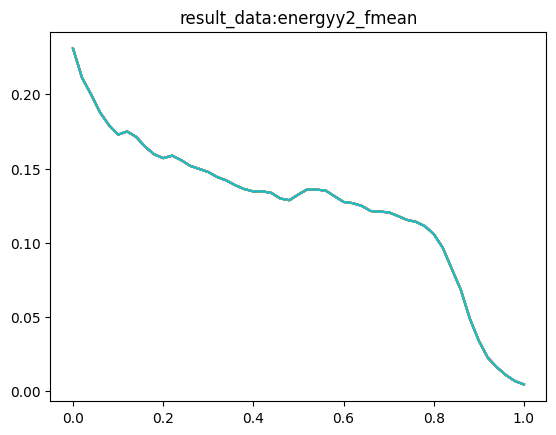

In [229]:
dataset = datasets[5]

oresult = torch.load(f'./evaluation/{dataset}')
# oresult[5,:,:] = oresult[0,:,:]
# oresult[1,:,:] = oresult[2,:,:]

extension = torch.cat([oresult,oresult], dim=1)
for s in range(10):
    for idx in range(4):
        extension[s,51:,idx] = extension[s,50,idx]
        
result = extension.clone().numpy()

ref = np.zeros(result.shape)

for s in range(10):
    for idx in range(4):
        temp = remove_outliers_and_fill(result[s,:,idx], threshold=0.05, window_size=2)
        ref[s,:,idx] = temp
ref = ref[:,:51,:]

oalpha = torch.linspace(0,1,51)
alpha = torch.linspace(0,1,51)

plt.figure()
for seed in range(10):
    plt.plot(oalpha, oresult[seed,:,1]);
plt.title(f'{dataset}_origin');
plt.figure()
for seed in range(10):
    plt.plot(alpha, ref[seed,:,1], label=f'{seed}');
plt.title(f'{dataset}_filtered');
plt.legend()
plt.figure()
reff = ref.mean(0)
plt.figure()
for seed in range(10):
    plt.plot(alpha, reff[:,1]);
plt.title(f'{dataset}_fmean');

for seed in range(10):
    manual_result[5,seed,:,1] = ref[seed,:,1]
    manual_result[5,seed,:,3] = ref[seed,:,3]

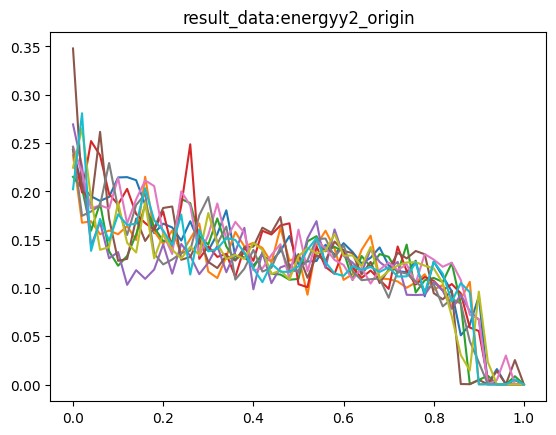

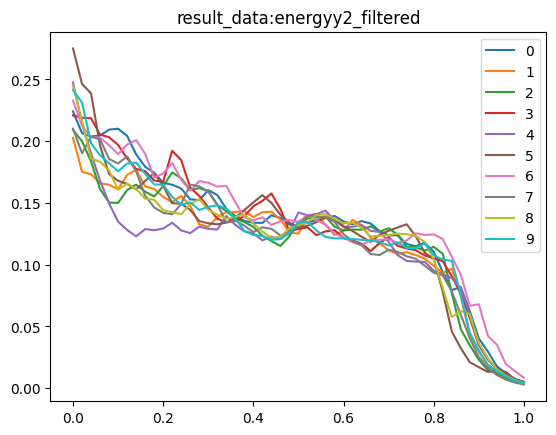

<Figure size 640x480 with 0 Axes>

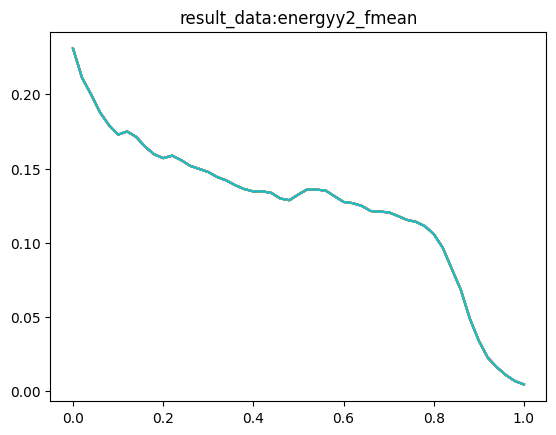

In [232]:
dataset = datasets[5]

oresult = torch.load(f'./evaluation/{dataset}')
# oresult[5,:,:] = oresult[0,:,:]
# oresult[1,:,:] = oresult[2,:,:]

extension = torch.cat([oresult,oresult], dim=1)
for s in range(10):
    for idx in range(4):
        extension[s,51:,idx] = extension[s,50,idx]
        
result = extension.clone().numpy()

ref = np.zeros(result.shape)

for s in range(10):
    for idx in range(4):
        temp = remove_outliers_and_fill(result[s,:,idx], threshold=0.05, window_size=2)
        ref[s,:,idx] = temp
ref = ref[:,:51,:]

oalpha = torch.linspace(0,1,51)
alpha = torch.linspace(0,1,51)

plt.figure()
for seed in range(10):
    plt.plot(oalpha, oresult[seed,:,1]);
plt.title(f'{dataset}_origin');
plt.figure()
for seed in range(10):
    plt.plot(alpha, ref[seed,:,1], label=f'{seed}');
plt.title(f'{dataset}_filtered');
plt.legend()
plt.figure()
reff = ref.mean(0)
plt.figure()
for seed in range(10):
    plt.plot(alpha, reff[:,1]);
plt.title(f'{dataset}_fmean');

for seed in range(10):
    manual_result[5,seed,:,1] = ref[seed,:,1]
    manual_result[5,seed,:,3] = ref[seed,:,3]

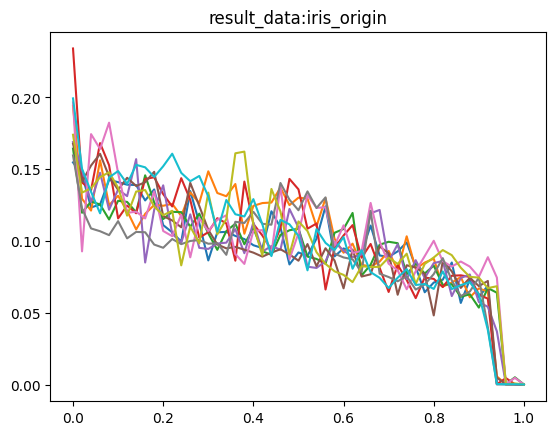

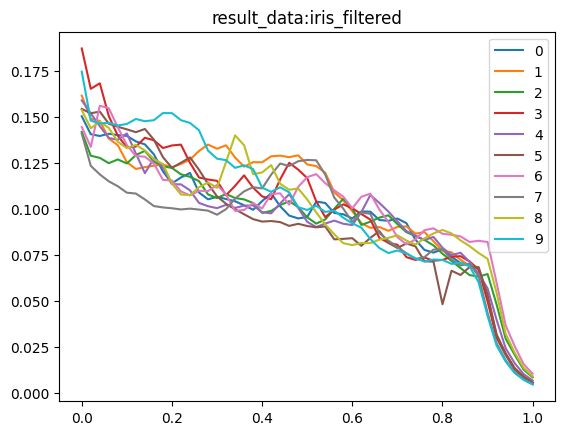

<Figure size 640x480 with 0 Axes>

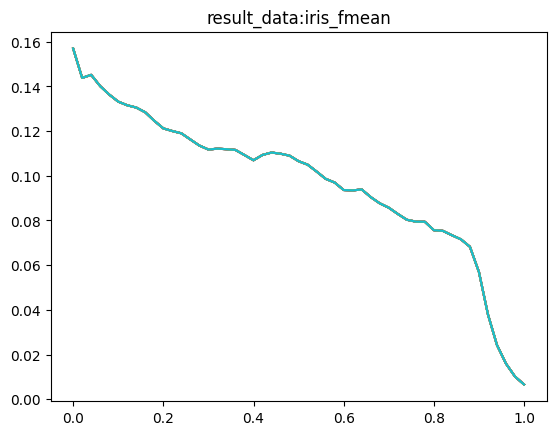

In [234]:
dataset = datasets[6]

oresult = torch.load(f'./evaluation/{dataset}')
# oresult[5,:,:] = oresult[0,:,:]
# oresult[1,:,:] = oresult[2,:,:]

extension = torch.cat([oresult,oresult], dim=1)
for s in range(10):
    for idx in range(4):
        extension[s,51:,idx] = extension[s,50,idx]
        
result = extension.clone().numpy()

ref = np.zeros(result.shape)

for s in range(10):
    for idx in range(4):
        temp = remove_outliers_and_fill(result[s,:,idx], threshold=0.05, window_size=2)
        ref[s,:,idx] = temp
ref = ref[:,:51,:]

oalpha = torch.linspace(0,1,51)
alpha = torch.linspace(0,1,51)

plt.figure()
for seed in range(10):
    plt.plot(oalpha, oresult[seed,:,3]);
plt.title(f'{dataset}_origin');
plt.figure()
for seed in range(10):
    plt.plot(alpha, ref[seed,:,3], label=f'{seed}');
plt.title(f'{dataset}_filtered');
plt.legend()
plt.figure()
reff = ref.mean(0)
plt.figure()
for seed in range(10):
    plt.plot(alpha, reff[:,3]);
plt.title(f'{dataset}_fmean');

for seed in range(10):
    manual_result[6,seed,:,1] = ref[seed,:,1]
    manual_result[6,seed,:,3] = ref[seed,:,3]

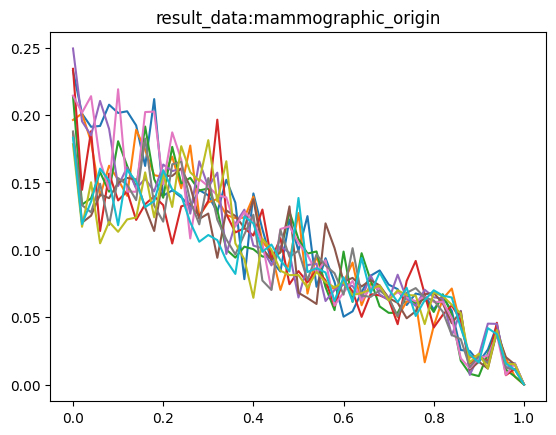

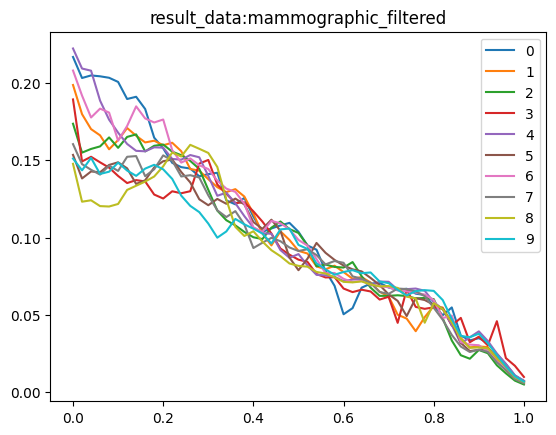

<Figure size 640x480 with 0 Axes>

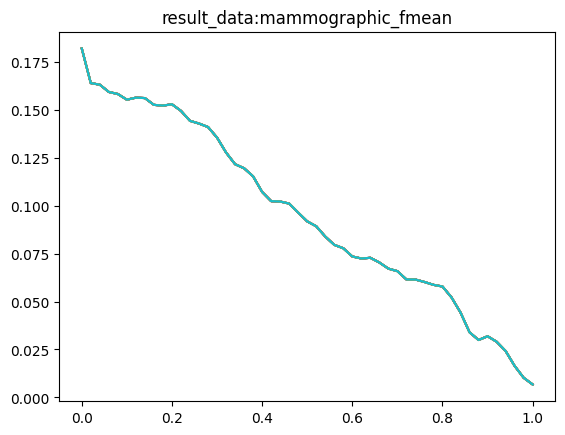

In [236]:
dataset = datasets[7]

oresult = torch.load(f'./evaluation/{dataset}')
# oresult[5,:,:] = oresult[0,:,:]
# oresult[1,:,:] = oresult[2,:,:]

extension = torch.cat([oresult,oresult], dim=1)
for s in range(10):
    for idx in range(4):
        extension[s,51:,idx] = extension[s,50,idx]
        
result = extension.clone().numpy()

ref = np.zeros(result.shape)

for s in range(10):
    for idx in range(4):
        temp = remove_outliers_and_fill(result[s,:,idx], threshold=0.05, window_size=2)
        ref[s,:,idx] = temp
ref = ref[:,:51,:]

oalpha = torch.linspace(0,1,51)
alpha = torch.linspace(0,1,51)

plt.figure()
for seed in range(10):
    plt.plot(oalpha, oresult[seed,:,1]);
plt.title(f'{dataset}_origin');
plt.figure()
for seed in range(10):
    plt.plot(alpha, ref[seed,:,1], label=f'{seed}');
plt.title(f'{dataset}_filtered');
plt.legend()
plt.figure()
reff = ref.mean(0)
plt.figure()
for seed in range(10):
    plt.plot(alpha, reff[:,1]);
plt.title(f'{dataset}_fmean');

for seed in range(10):
    manual_result[7,seed,:,1] = ref[seed,:,1]
    manual_result[7,seed,:,3] = ref[seed,:,3]

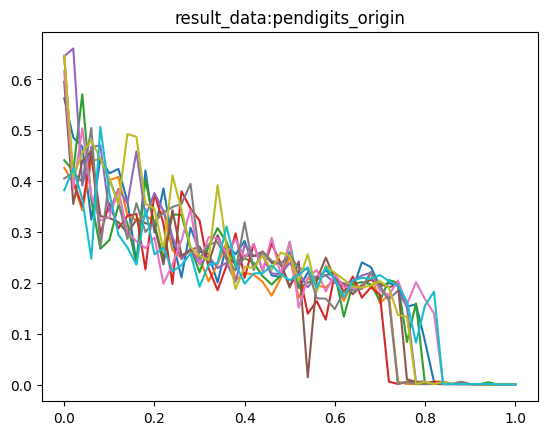

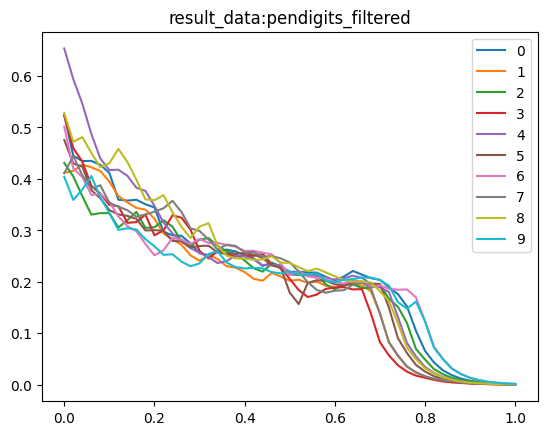

<Figure size 640x480 with 0 Axes>

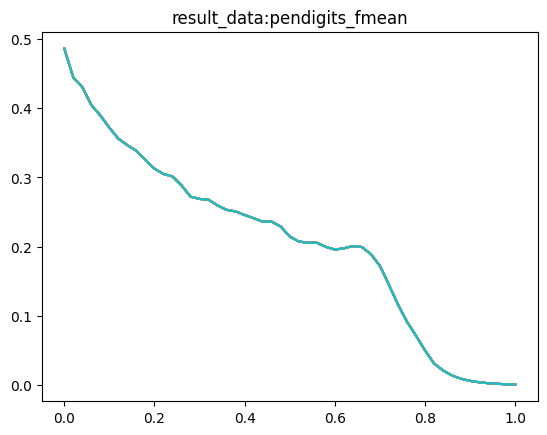

In [238]:
dataset = datasets[8]

oresult = torch.load(f'./evaluation/{dataset}')
# oresult[5,:,:] = oresult[0,:,:]
# oresult[1,:,:] = oresult[2,:,:]

extension = torch.cat([oresult,oresult], dim=1)
for s in range(10):
    for idx in range(4):
        extension[s,51:,idx] = extension[s,50,idx]
        
result = extension.clone().numpy()

ref = np.zeros(result.shape)

for s in range(10):
    for idx in range(4):
        temp = remove_outliers_and_fill(result[s,:,idx], threshold=0.05, window_size=2)
        ref[s,:,idx] = temp
ref = ref[:,:51,:]

oalpha = torch.linspace(0,1,51)
alpha = torch.linspace(0,1,51)

plt.figure()
for seed in range(10):
    plt.plot(oalpha, oresult[seed,:,3]);
plt.title(f'{dataset}_origin');
plt.figure()
for seed in range(10):
    plt.plot(alpha, ref[seed,:,3], label=f'{seed}');
plt.title(f'{dataset}_filtered');
plt.legend()
plt.figure()
reff = ref.mean(0)
plt.figure()
for seed in range(10):
    plt.plot(alpha, reff[:,3]);
plt.title(f'{dataset}_fmean');

for seed in range(10):
    manual_result[8,seed,:,1] = ref[seed,:,1]
    manual_result[8,seed,:,3] = ref[seed,:,3]

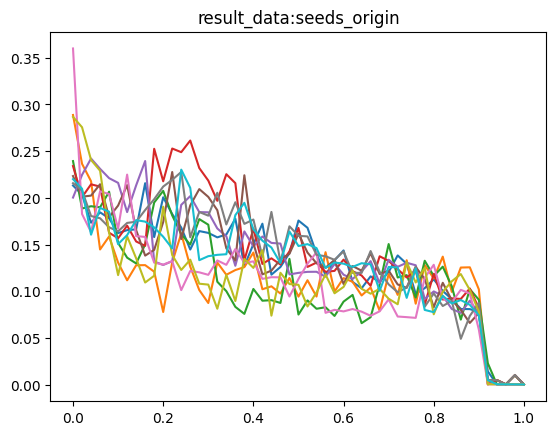

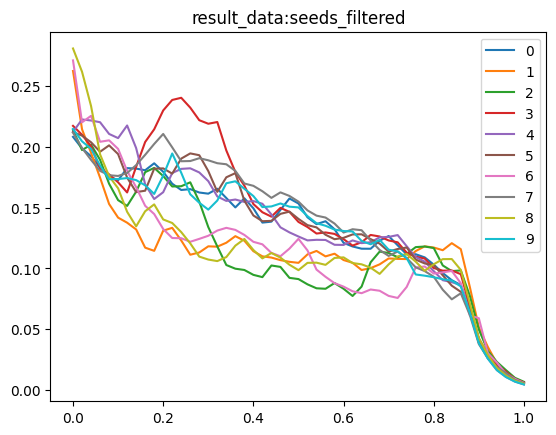

<Figure size 640x480 with 0 Axes>

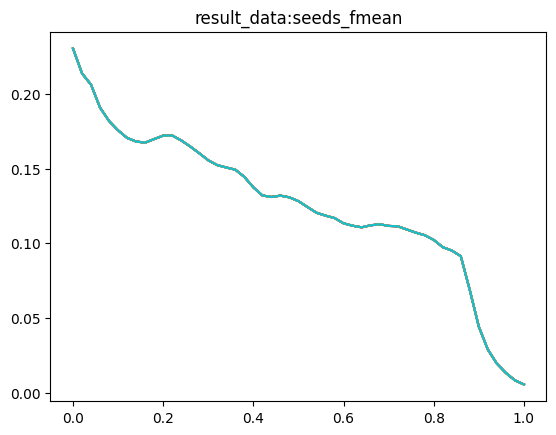

In [240]:
dataset = datasets[9]

oresult = torch.load(f'./evaluation/{dataset}')
# oresult[5,:,:] = oresult[0,:,:]
# oresult[1,:,:] = oresult[2,:,:]

extension = torch.cat([oresult,oresult], dim=1)
for s in range(10):
    for idx in range(4):
        extension[s,51:,idx] = extension[s,50,idx]
        
result = extension.clone().numpy()

ref = np.zeros(result.shape)

for s in range(10):
    for idx in range(4):
        temp = remove_outliers_and_fill(result[s,:,idx], threshold=0.05, window_size=2)
        ref[s,:,idx] = temp
ref = ref[:,:51,:]

oalpha = torch.linspace(0,1,51)
alpha = torch.linspace(0,1,51)

plt.figure()
for seed in range(10):
    plt.plot(oalpha, oresult[seed,:,1]);
plt.title(f'{dataset}_origin');
plt.figure()
for seed in range(10):
    plt.plot(alpha, ref[seed,:,1], label=f'{seed}');
plt.title(f'{dataset}_filtered');
plt.legend()
plt.figure()
reff = ref.mean(0)
plt.figure()
for seed in range(10):
    plt.plot(alpha, reff[:,1]);
plt.title(f'{dataset}_fmean');

for seed in range(10):
    manual_result[9,seed,:,1] = ref[seed,:,1]
    manual_result[9,seed,:,3] = ref[seed,:,3]

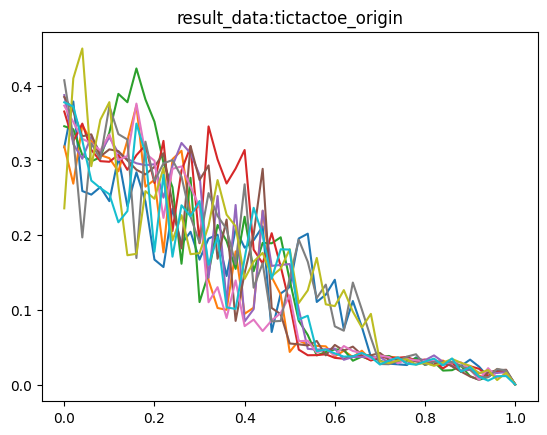

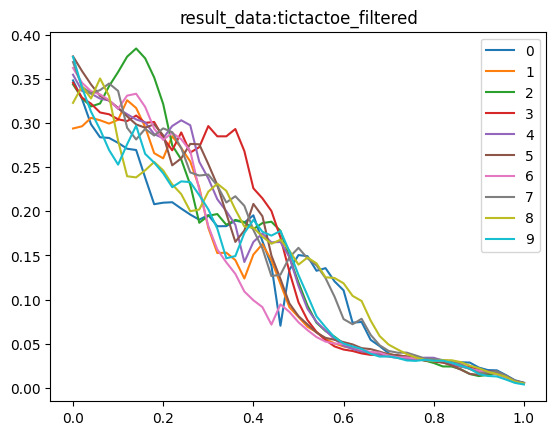

<Figure size 640x480 with 0 Axes>

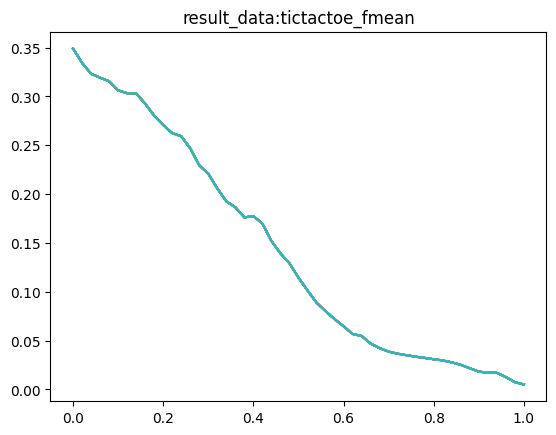

In [242]:
dataset = datasets[10]

oresult = torch.load(f'./evaluation/{dataset}')
# oresult[5,:,:] = oresult[0,:,:]
# oresult[1,:,:] = oresult[2,:,:]

extension = torch.cat([oresult,oresult], dim=1)
for s in range(10):
    for idx in range(4):
        extension[s,51:,idx] = extension[s,50,idx]
        
result = extension.clone().numpy()

ref = np.zeros(result.shape)

for s in range(10):
    for idx in range(4):
        temp = remove_outliers_and_fill(result[s,:,idx], threshold=0.05, window_size=2)
        ref[s,:,idx] = temp
ref = ref[:,:51,:]

oalpha = torch.linspace(0,1,51)
alpha = torch.linspace(0,1,51)

plt.figure()
for seed in range(10):
    plt.plot(oalpha, oresult[seed,:,3]);
plt.title(f'{dataset}_origin');
plt.figure()
for seed in range(10):
    plt.plot(alpha, ref[seed,:,3], label=f'{seed}');
plt.title(f'{dataset}_filtered');
plt.legend()
plt.figure()
reff = ref.mean(0)
plt.figure()
for seed in range(10):
    plt.plot(alpha, reff[:,3]);
plt.title(f'{dataset}_fmean');

for seed in range(10):
    manual_result[10,seed,:,1] = ref[seed,:,1]
    manual_result[10,seed,:,3] = ref[seed,:,3]

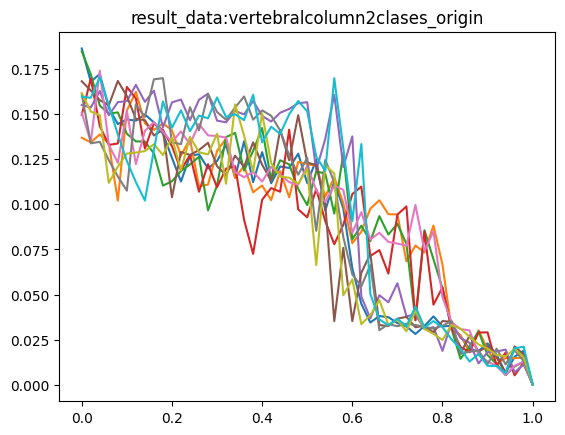

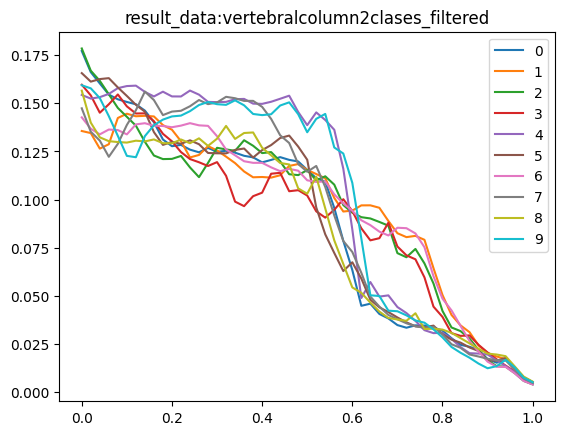

<Figure size 640x480 with 0 Axes>

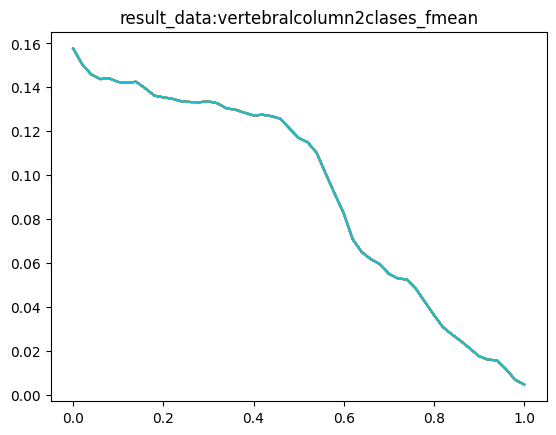

In [244]:
dataset = datasets[11]

oresult = torch.load(f'./evaluation/{dataset}')
# oresult[5,:,:] = oresult[0,:,:]
# oresult[1,:,:] = oresult[2,:,:]

extension = torch.cat([oresult,oresult], dim=1)
for s in range(10):
    for idx in range(4):
        extension[s,51:,idx] = extension[s,50,idx]
        
result = extension.clone().numpy()

ref = np.zeros(result.shape)

for s in range(10):
    for idx in range(4):
        temp = remove_outliers_and_fill(result[s,:,idx], threshold=0.05, window_size=2)
        ref[s,:,idx] = temp
ref = ref[:,:51,:]

oalpha = torch.linspace(0,1,51)
alpha = torch.linspace(0,1,51)

plt.figure()
for seed in range(10):
    plt.plot(oalpha, oresult[seed,:,1]);
plt.title(f'{dataset}_origin');
plt.figure()
for seed in range(10):
    plt.plot(alpha, ref[seed,:,1], label=f'{seed}');
plt.title(f'{dataset}_filtered');
plt.legend()
plt.figure()
reff = ref.mean(0)
plt.figure()
for seed in range(10):
    plt.plot(alpha, reff[:,1]);
plt.title(f'{dataset}_fmean');

for seed in range(10):
    manual_result[11,seed,:,1] = ref[seed,:,1]
    manual_result[11,seed,:,3] = ref[seed,:,3]

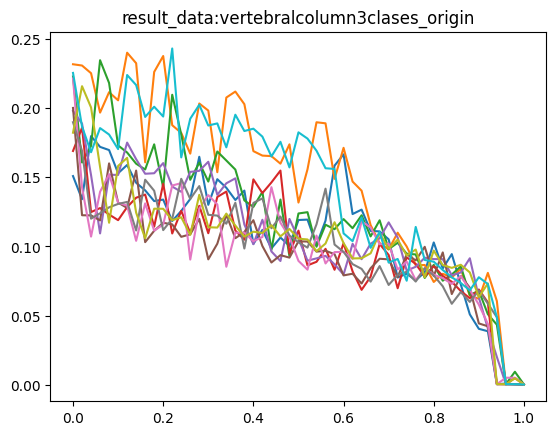

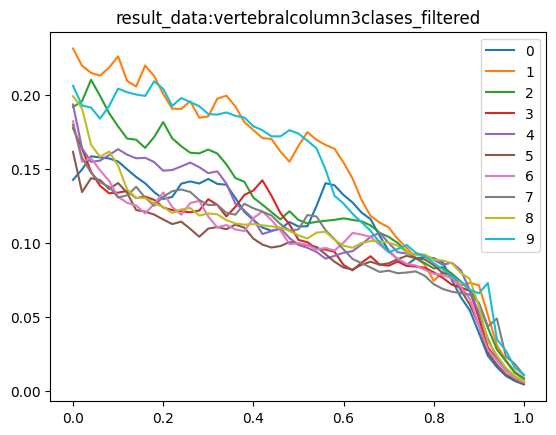

<Figure size 640x480 with 0 Axes>

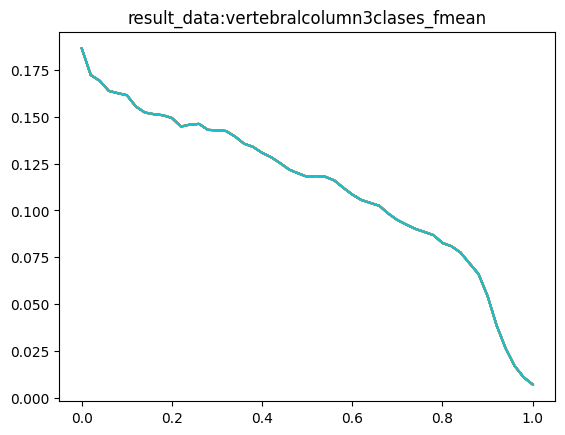

In [246]:
dataset = datasets[12]

oresult = torch.load(f'./evaluation/{dataset}')
# oresult[5,:,:] = oresult[0,:,:]
# oresult[1,:,:] = oresult[2,:,:]

extension = torch.cat([oresult,oresult], dim=1)
for s in range(10):
    for idx in range(4):
        extension[s,51:,idx] = extension[s,50,idx]
        
result = extension.clone().numpy()

ref = np.zeros(result.shape)

for s in range(10):
    for idx in range(4):
        temp = remove_outliers_and_fill(result[s,:,idx], threshold=0.05, window_size=2)
        ref[s,:,idx] = temp
ref = ref[:,:51,:]

oalpha = torch.linspace(0,1,51)
alpha = torch.linspace(0,1,51)

plt.figure()
for seed in range(10):
    plt.plot(oalpha, oresult[seed,:,3]);
plt.title(f'{dataset}_origin');
plt.figure()
for seed in range(10):
    plt.plot(alpha, ref[seed,:,3], label=f'{seed}');
plt.title(f'{dataset}_filtered');
plt.legend()
plt.figure()
reff = ref.mean(0)
plt.figure()
for seed in range(10):
    plt.plot(alpha, reff[:,3]);
plt.title(f'{dataset}_fmean');

for seed in range(10):
    manual_result[12,seed,:,1] = ref[seed,:,1]
    manual_result[12,seed,:,3] = ref[seed,:,3]

In [248]:
final_result = torch.tensor(manual_result)
final_result.shape

torch.Size([13, 10, 51, 4])

/scratch/slurm_tmpdir/job_22173886/ipykernel_643544/1930194257.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


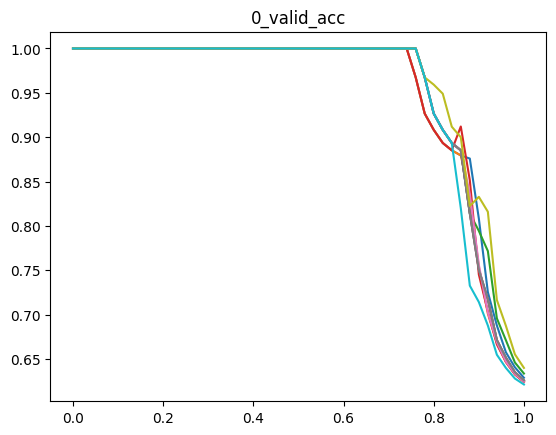

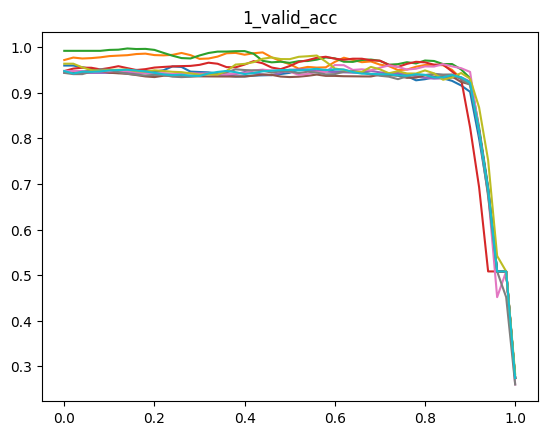

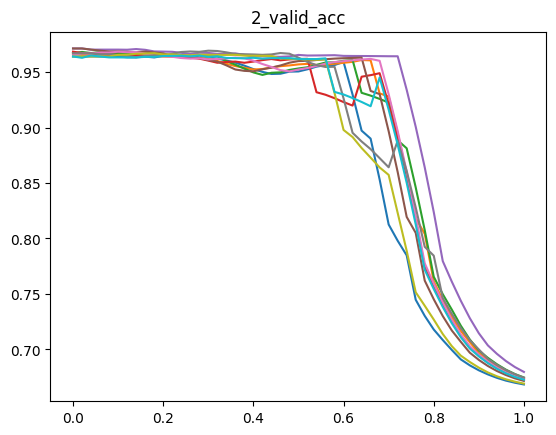

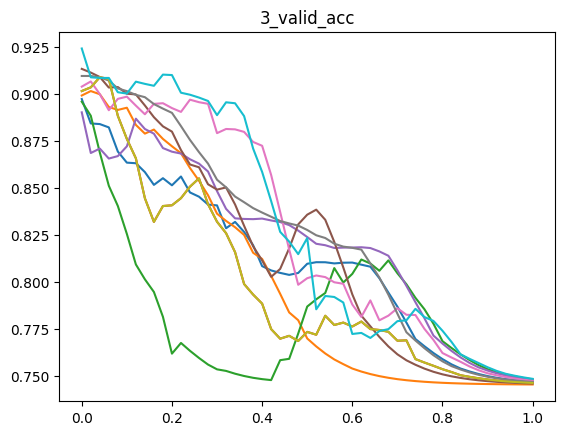

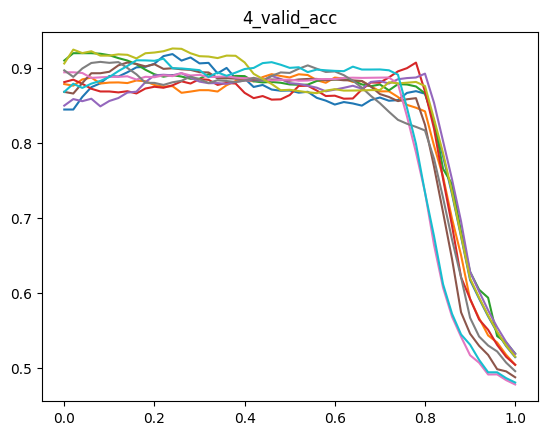

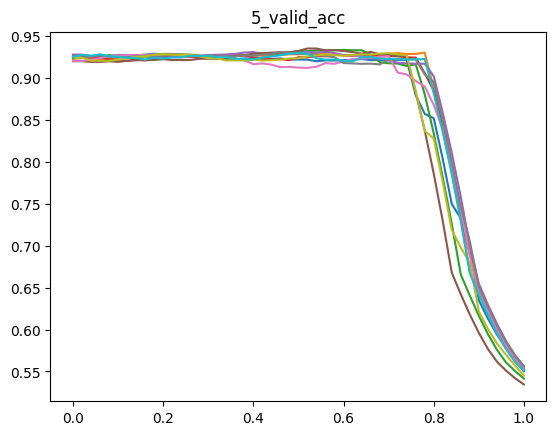

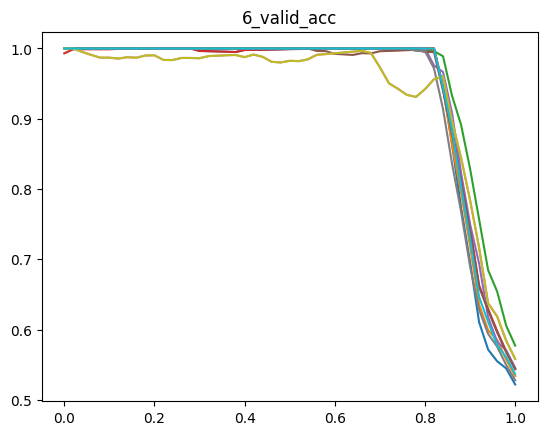

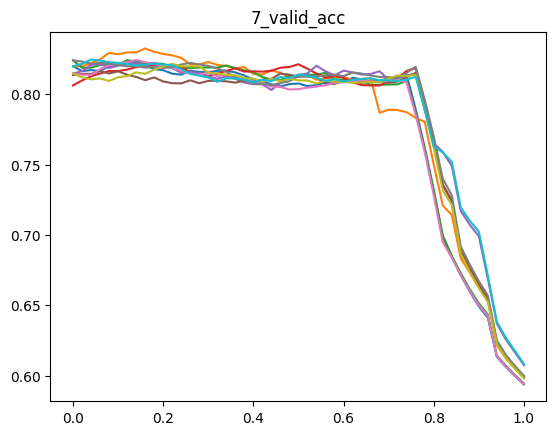

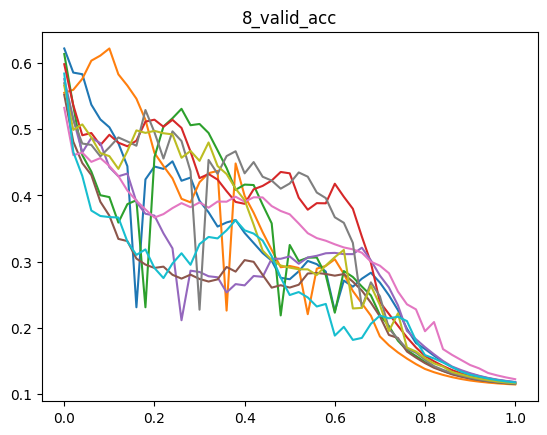

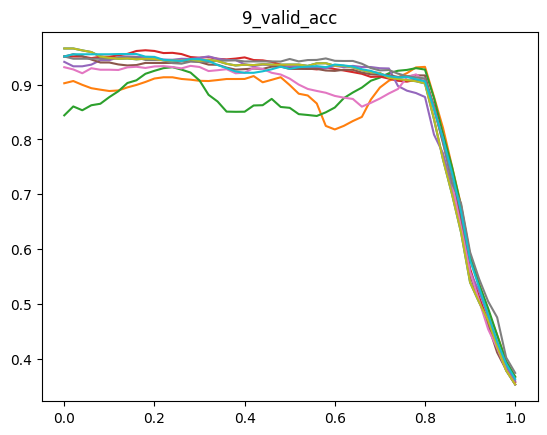

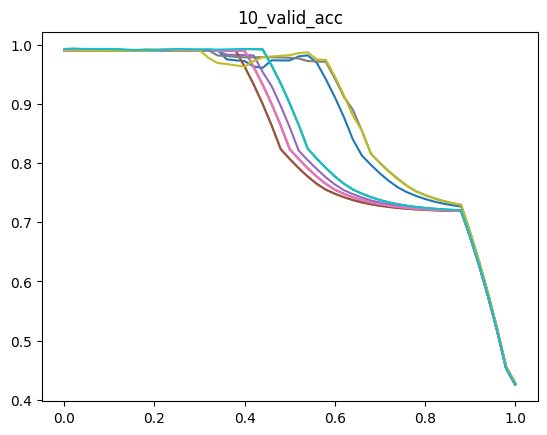

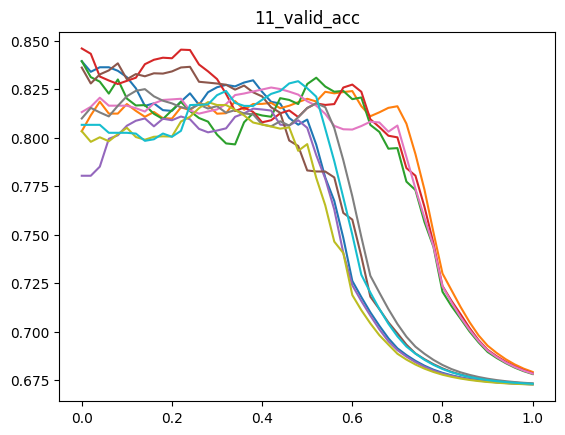

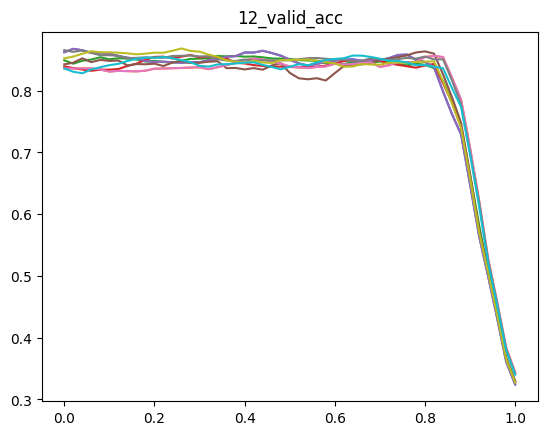

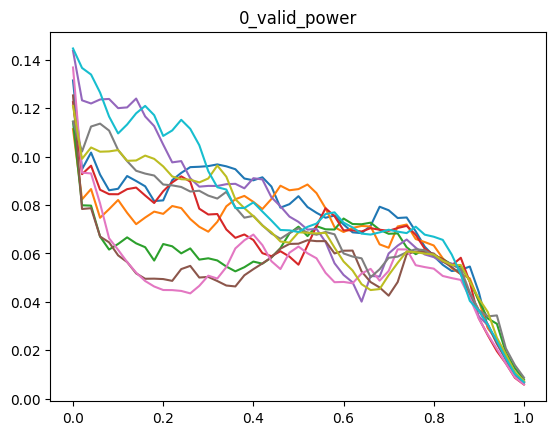

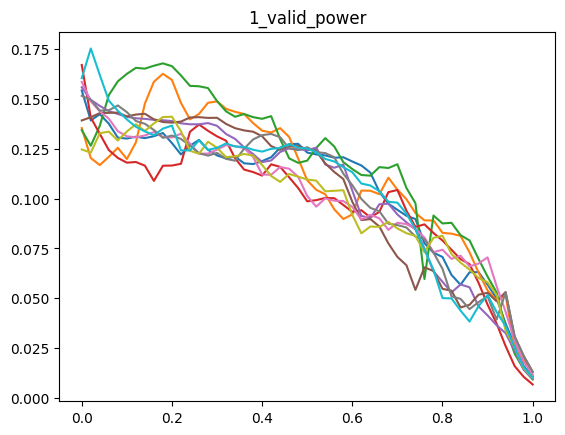

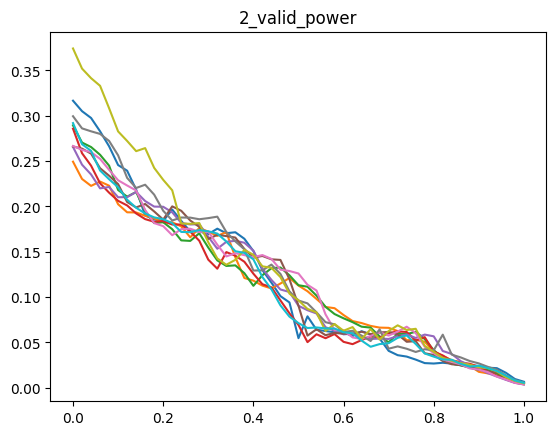

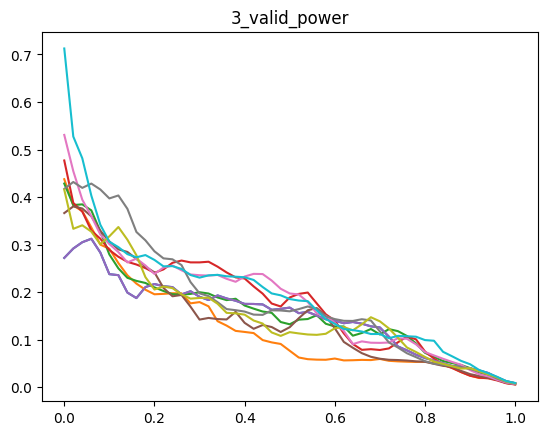

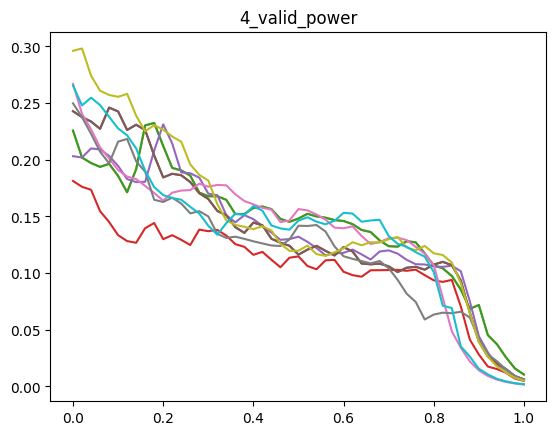

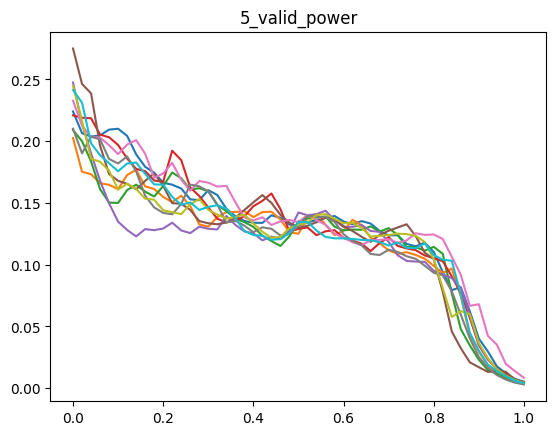

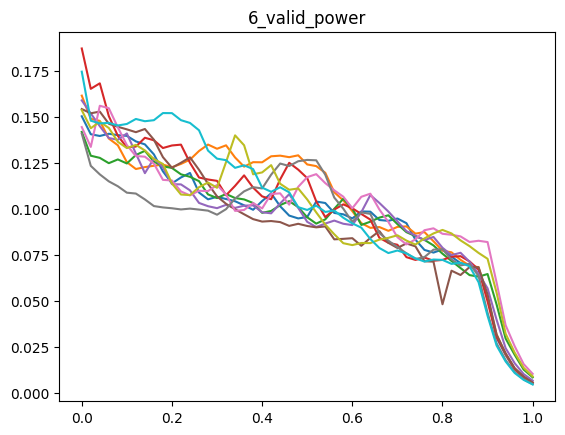

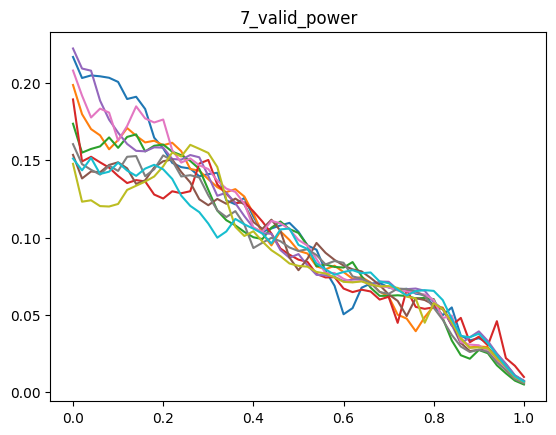

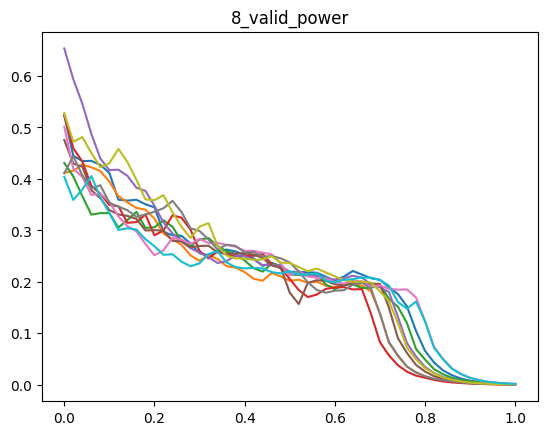

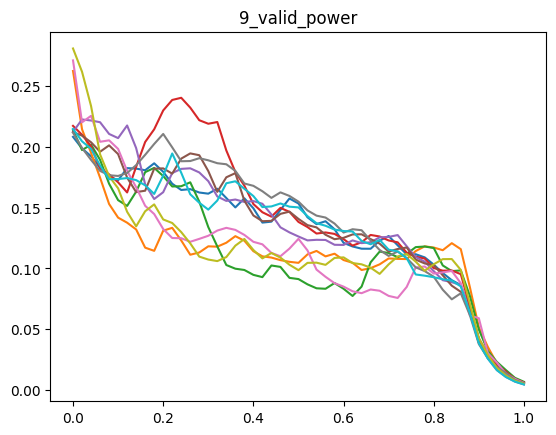

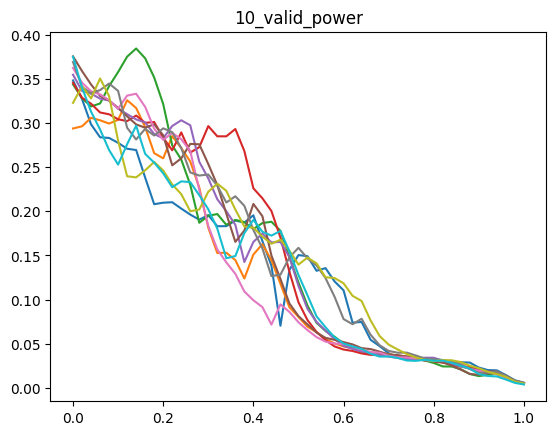

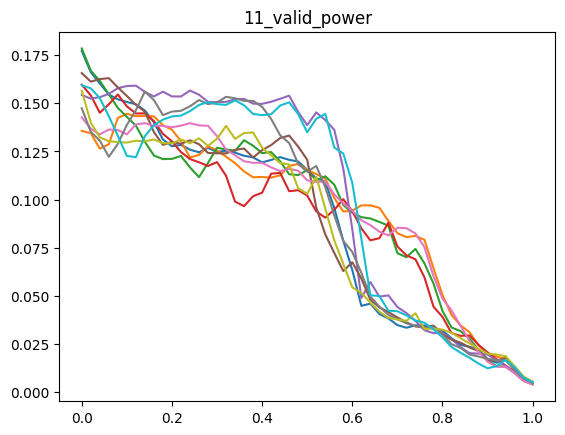

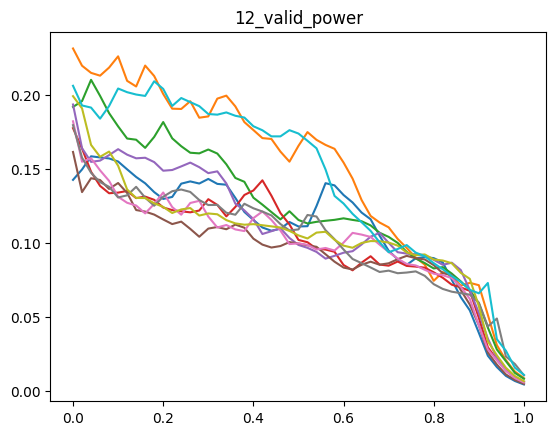

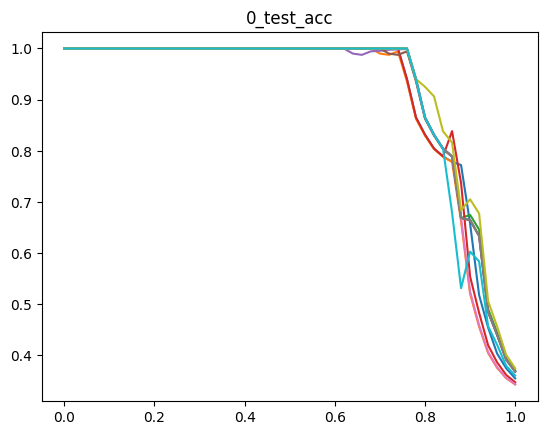

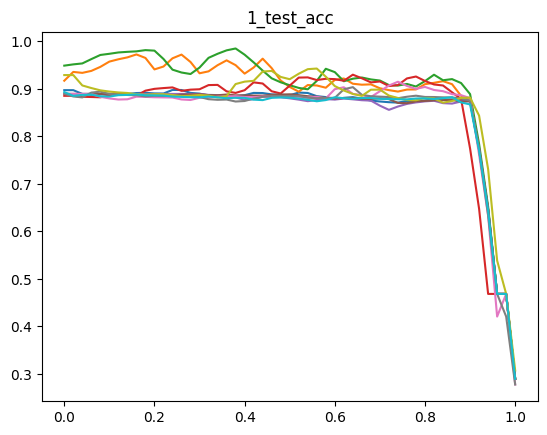

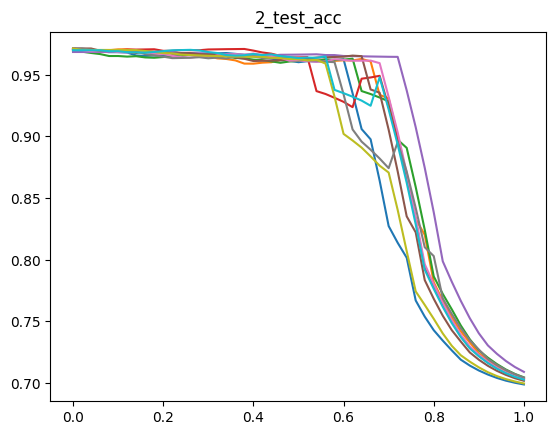

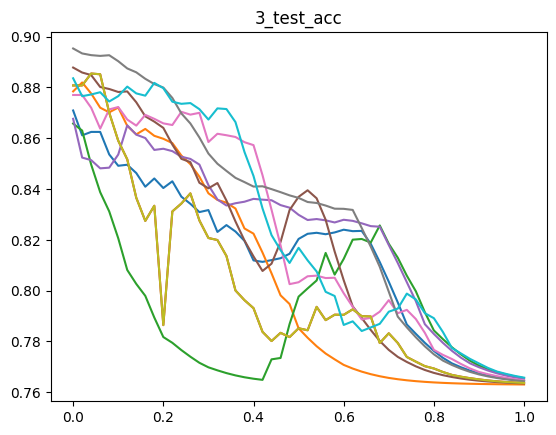

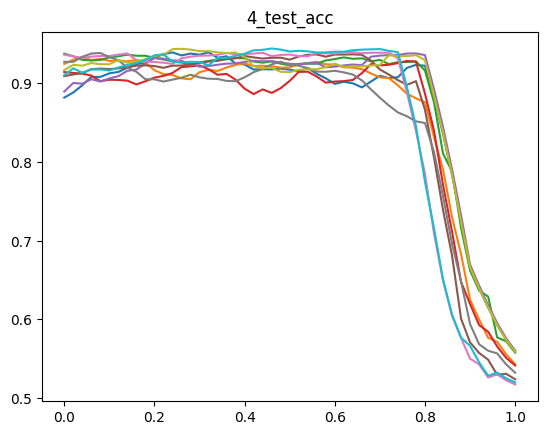

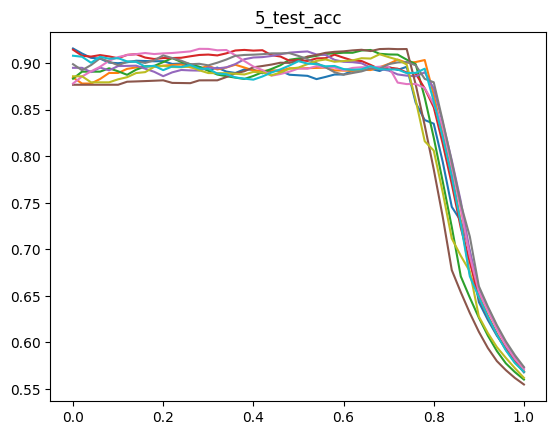

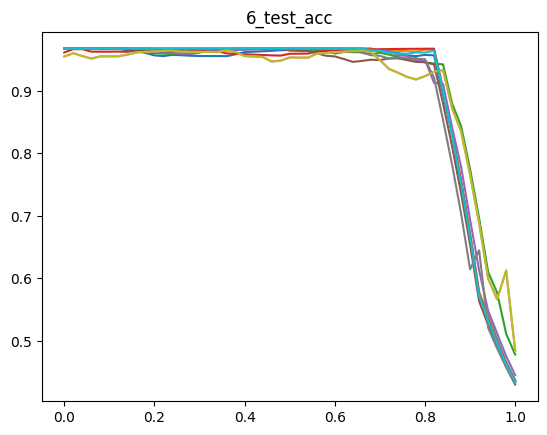

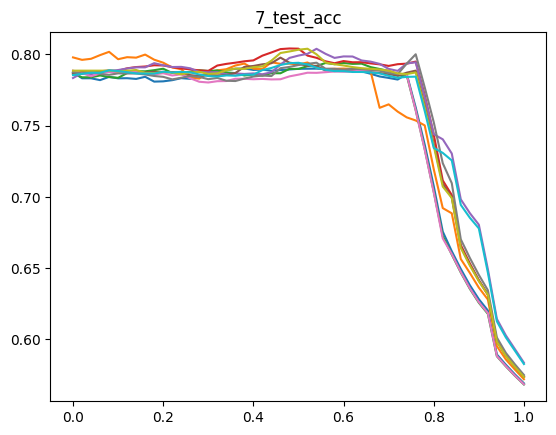

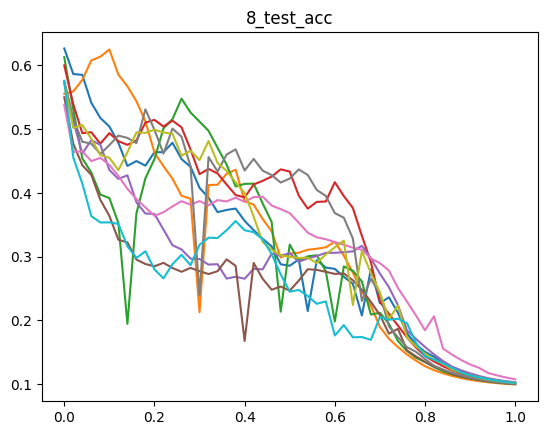

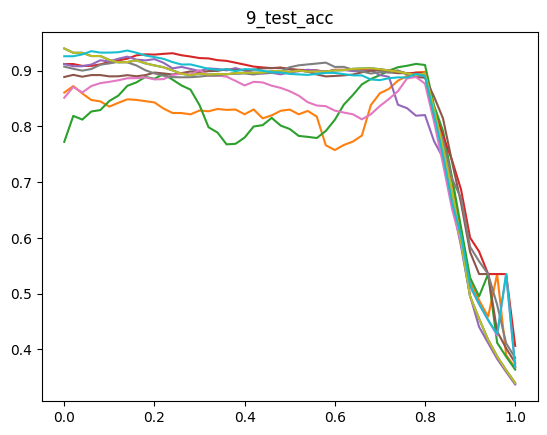

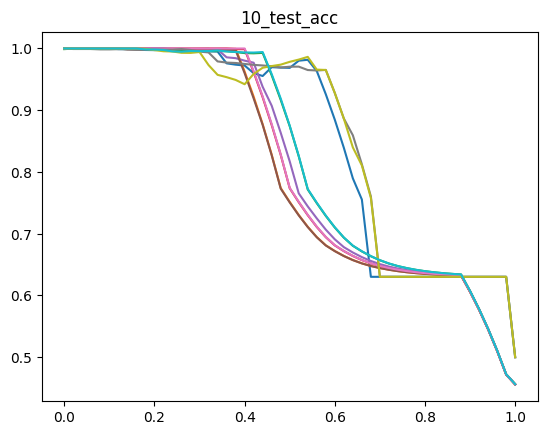

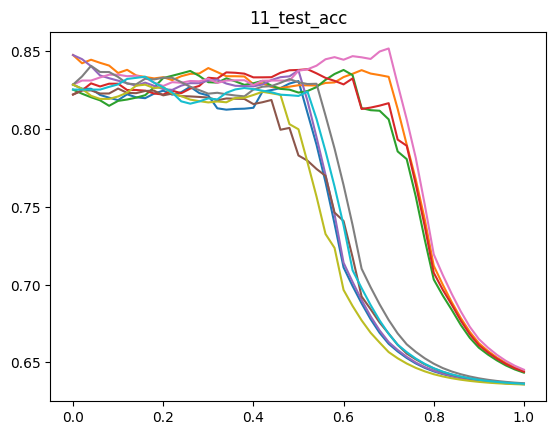

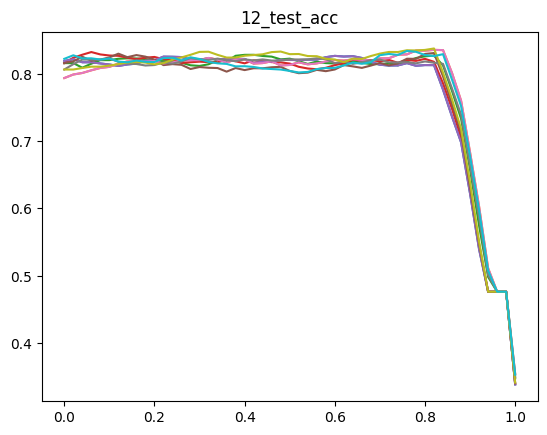

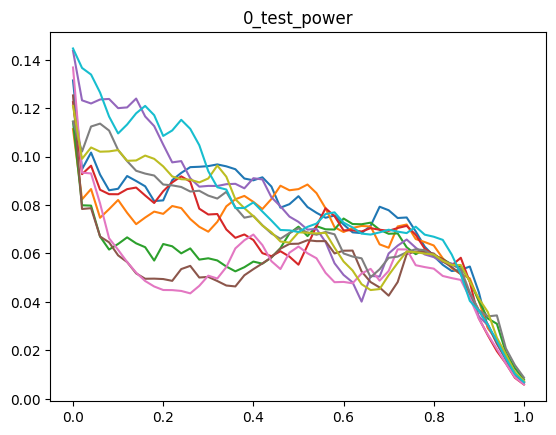

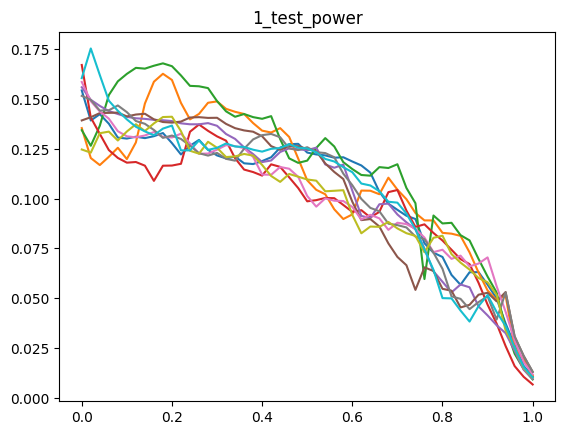

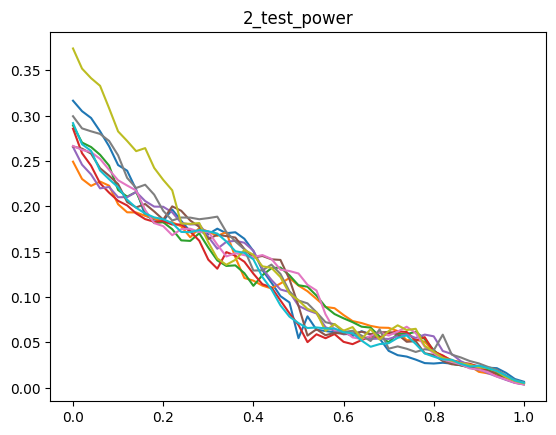

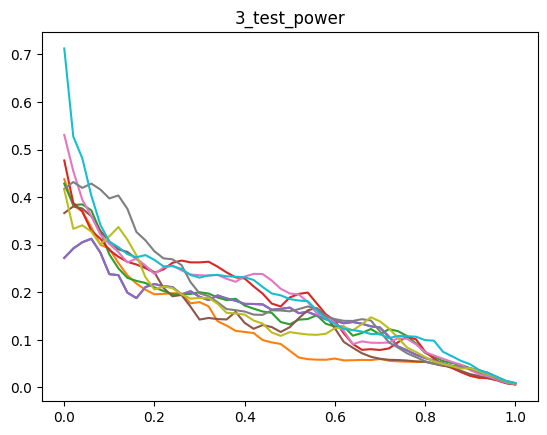

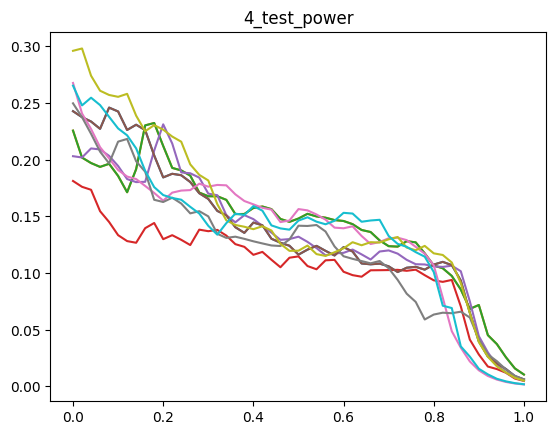

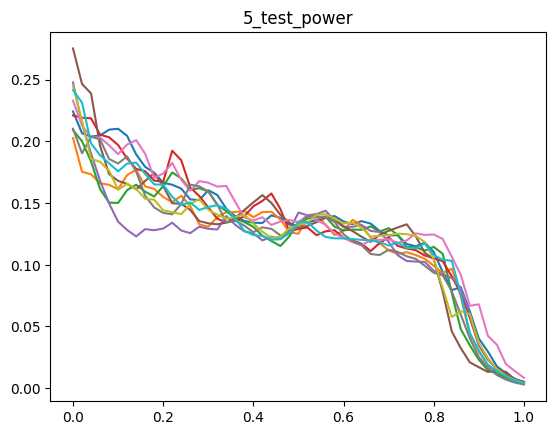

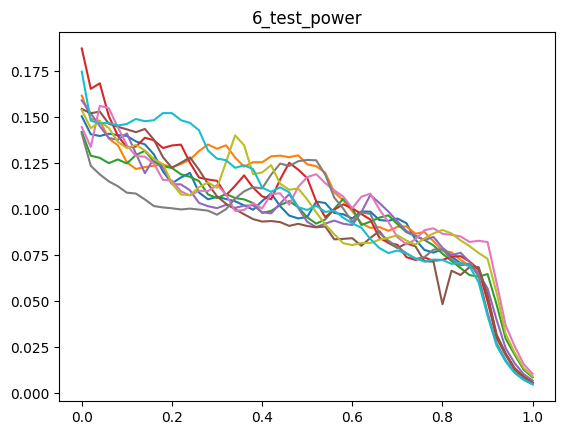

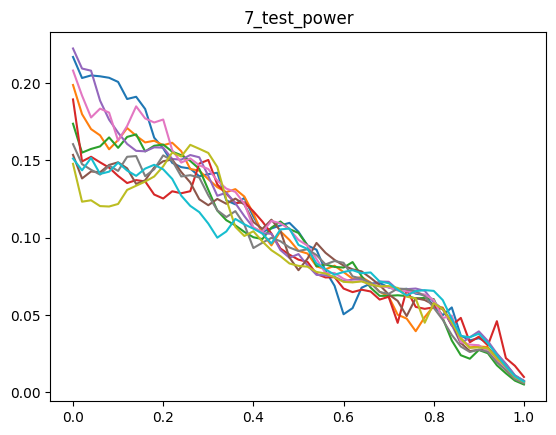

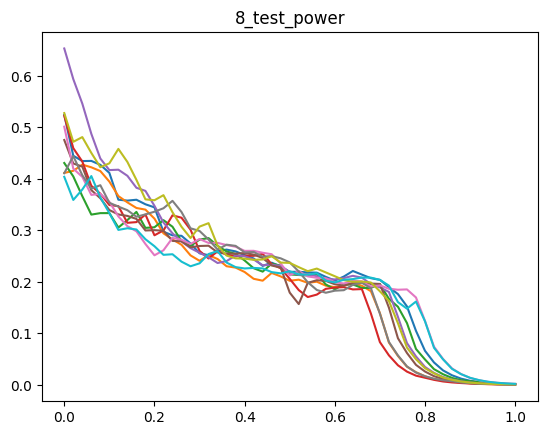

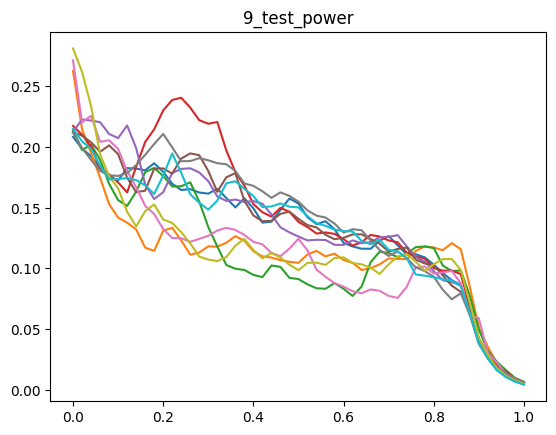

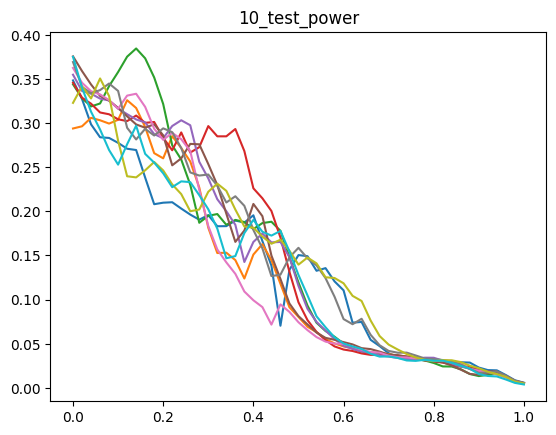

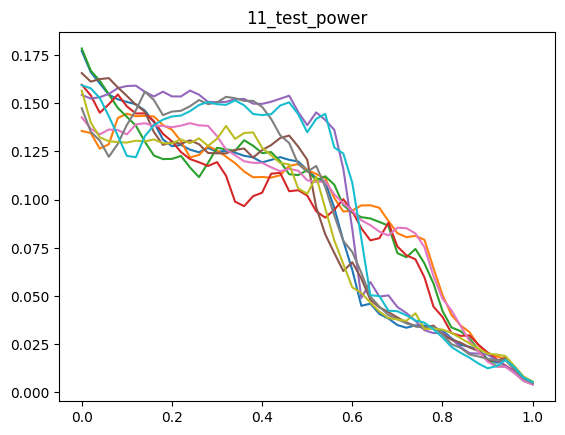

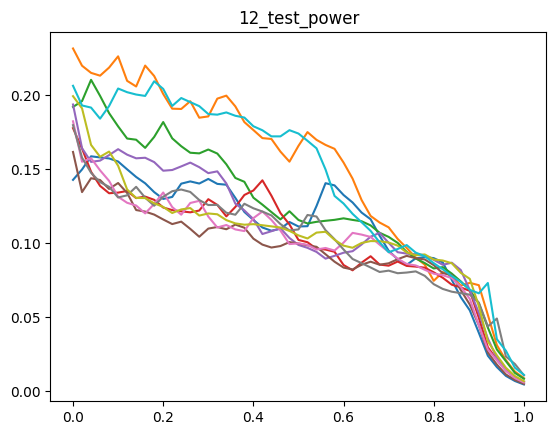

In [252]:
for idx in range(4):
    for ds in range(13):
    
        plt.figure()
        for seed in range(10):
            if idx == 0:
                name = 'valid_acc'
            elif idx == 1:
                name = 'valid_power'
            elif idx == 2:
                name = 'test_acc'
            elif idx == 3:
                name = 'test_power'
            plt.plot(alpha, final_result[ds,seed,:,idx])
        plt.title(f'{ds}_{name}')


In [253]:
torch.save(final_result, 'result.matrix')